<a href="https://colab.research.google.com/github/aynaval/Coronavirus_Tweet_Sentiment_Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
pd.set_option('display.max_colwidth', None) # to display full text in column

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [11]:
data = pd.read_csv('data/Coronavirus Tweets.csv',encoding = "ISO-8859-1")

In [12]:
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                                                                                                                                                                                                                                                                                                        OriginalTweet  \
0                                                                                                                                                                                                                     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1                                                                                       advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order   
2                                                                                                                                                                                                 Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P   
3   My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j   
4  Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n   

            Sentiment  
0             Neutral  
1            Positive  
2            Positive  
3            Positive  
4  Extremely Negative

In [13]:
data.sample(5)

UserName  ScreenName                       Location     TweetAt  \
34000     37799       82751  Fairfield County, Connecticut  08-04-2020   
15372     19171       64123                            NaN  22-03-2020   
6955      10754       55706                   Brighton, UK  19-03-2020   
10074     13873       58825                            USA  20-03-2020   
24796     28595       73547                      Sri Lanka  27-03-2020   

                                                                                                                                                                                                                                                                       OriginalTweet  \
34000  #Coronavirus\r\r\n\r\r\nMy fellow Brethren who have embarrassingly worn their masks &amp; latex gloves in public, sprayed more Lysol, used more Clorox Wipes &amp; hand sanitizer ever imaginable.  We all have something in common.  We fear our wives more than Covid-19...   
15372                                                                                                                                         @FOX4 Wtf is the deal with toilet paper?! Most of us have a shower right next to the toilet. Come on people! #coronavirus #toiletpaper   
6955                                                                                                                                                                                                                                       Indie toy retailers step up during crisis   
10074                                  Effective April 13, 2020.\r\r\nFederal Register :: #Safety and Effectiveness of Consumer #Antiseptic Rubs; Topical #Antimicrobial Drug Products for Over-the-Counter Human Use #COVID19 #Coronavirus #Prevention #CER https://t.co/4x4GpZzNUN   
24796                                                If you re going to raid supermarkets on Tuesday hold on a second Don t ignore your local grocery store or the small boutique shop in your town close to your house This is a time when they need your help more than ever         

                Sentiment  
34000            Negative  
15372            Negative  
6955   Extremely Negative  
10074            Positive  
24796            Positive

In [14]:
data.tail(5)

UserName  ScreenName                      Location     TweetAt  \
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                                                                                                                                                                                                                                         OriginalTweet  \
41152                                                                                                                                                           Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp   
41153                                                                                                                       Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?   
41154                                                                                                                         You know itÂs getting tough when @KameronWilds  is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!   
41155                                                                                                                                            Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus   
41156  @TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe   

                Sentiment  
41152             Neutral  
41153  Extremely Negative  
41154            Positive  
41155             Neutral  
41156            Negative

In [15]:
data.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [27]:
len(data['Sentiment'].unique())


5

In [61]:
data.describe(include='all')

UserName    ScreenName Location     TweetAt  \
count   41157.000000  41157.000000    32567       41157   
unique           NaN           NaN    12220          30   
top              NaN           NaN   London  20-03-2020   
freq             NaN           NaN      540        3448   
mean    24377.000000  69329.000000      NaN         NaN   
std     11881.146851  11881.146851      NaN         NaN   
min      3799.000000  48751.000000      NaN         NaN   
25%     14088.000000  59040.000000      NaN         NaN   
50%     24377.000000  69329.000000      NaN         NaN   
75%     34666.000000  79618.000000      NaN         NaN   
max     44955.000000  89907.000000      NaN         NaN   

                                                                                                          OriginalTweet  \
count                                                                                                             41157   
unique                                                                                                            41157   
top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
freq                                                                                                                  1   
mean                                                                                                                NaN   
std                                                                                                                 NaN   
min                                                                                                                 NaN   
25%                                                                                                                 NaN   
50%                                                                                                                 NaN   
75%                                                                                                                 NaN   
max                                                                                                                 NaN   

       Sentiment  
count      41157  
unique         5  
top     Positive  
freq       11422  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

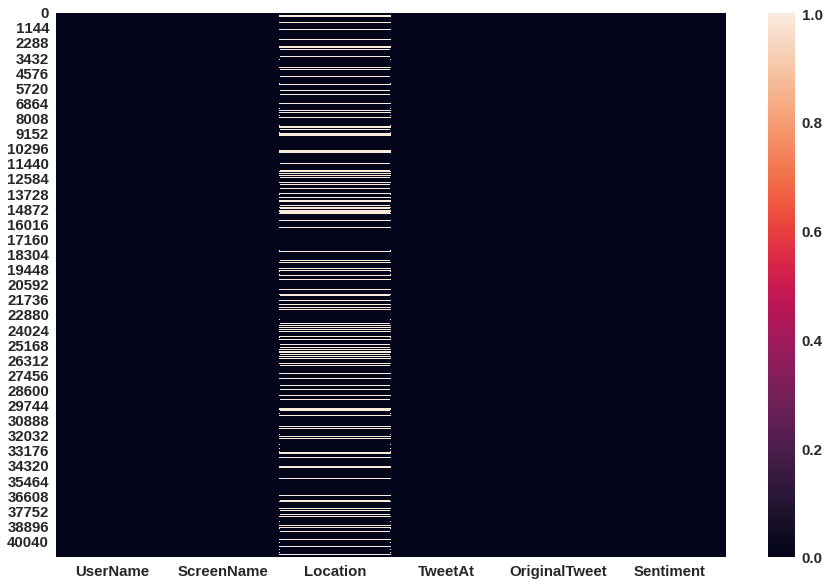

In [62]:
sns.heatmap(data.isnull());

* Location column has missing values and no other column has any missing values.

In [28]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [63]:
pd.concat([data.isnull().sum(),round((data.isnull().sum()/len(data.index))*100,2)],axis=1,keys=['Missing values','Percent'])

Missing values  Percent
UserName                    0     0.00
ScreenName                  0     0.00
Location                 8590    20.87
TweetAt                     0     0.00
OriginalTweet               0     0.00
Sentiment                   0     0.00

In [30]:
data.duplicated().value_counts()

False    41157
dtype: int64

In [32]:
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='corona.html')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [67]:
data.shape

(41157, 6)

In [68]:
data.size

246942

In [34]:
data.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

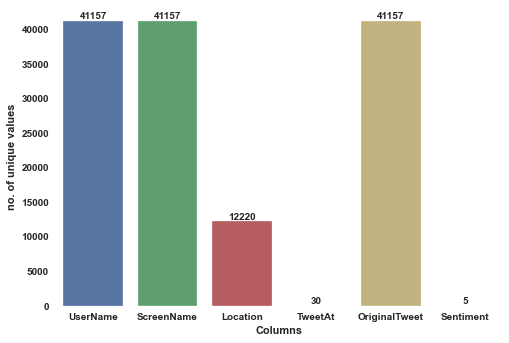

In [49]:
splot= sns.barplot(x= data.nunique().index,y=data.nunique().values);
splot.bar_label(splot.containers[0])
plt.xlabel('Columns')
plt.ylabel('no. of unique values');

* Username and Screenname are unique values and do not help in building generalized model hence they are dropped.

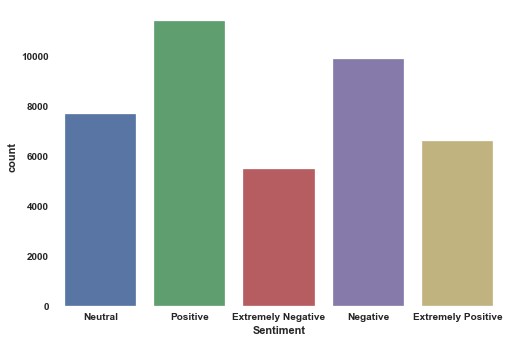

In [47]:
sns.countplot(data['Sentiment']);

* Most tweets are positive, followed by negative and neutral.
* Least number of tweets are extremely negative.

##**Sample of tweets according to emotion**

In [72]:
data[data['Sentiment'] == 'Neutral']['OriginalTweet'].sample(3)

38866                                                                                                              Wires, #data and algorithms: Is this the #retail #store of the future? \r\r\n#Covid_19 #Anticipate \r\r\nhttps://t.co/INvMra7bgY
21465    So the news in my area is that an elderly lady who only went shopping once a week ending up dying of I think it s time all elderly people self quarantined and had their groceries delivered This supermarket group visiting isn t working
3059                                                                                                                                                           Entering the grocery store before city lockdown #coronavirus https://t.co/U0V1abTGmJ
Name: OriginalTweet, dtype: object

In [73]:
data[data['Sentiment'] == 'Extremely Positive']['OriginalTweet'].sample(3)

18733                       If you had to work, then do so. Some of yr reasonings for safety are flawed though and whilst I agree somewhat that a client is likely safer with you than in a supermarket, "seeing only regular" wouldn't keep you safe nor makes any difference. Lol. Covid-19 ain't nobody's friend.
29683    Some encouraging data from Governor CuomoÂs daily briefing:\r\r\n- daily cases +8,327 (4/4) down from 10,841 (4/3) and 10,482 (4/2)\r\r\n- BIGGER is new hospitalizations +574 (4/4) vs 1,095 (4/3) and 1,427 (4/2)\r\r\n\r\r\nNY trend is better than @NYGovCuomo optimistic case https://t.co/JG5VsOsXBp
37075                       The person is a Cumberland County resident and the Health Department is investigating and reaching out to individuals who may have been in contact with the person who tested positive. \r\r\nLearn more ? https://t.co/XOSrdZcihN\r\r\n?We are in this together. Stay well, Cumberland.
Name: OriginalTweet, dtype: object

In [74]:
data[data['Sentiment'] == 'Positive']['OriginalTweet'].sample(3)

22472    In the wake of the govt of Pakistan has announced Rs 1 2 trillions Economic Relief and stimulus Package 1 Petrol Prices Reduced Rs 15 2 100 Billion Rupees Tax Refunds for Exporters 3 200 Billion Package for Laborers
39784                                                                                                        Interesting global data on consumer perception and behavior /via @McKinsey  #cg #retail #cx https://t.co/0jUy1K1qQs
30638                                                               Publix deploys contactless payment for extra COVID-19 safety | Supermarket News #COVID19 #supplychain #GroceryStore #gafoodindustry  https://t.co/VzGDkjtcxJ
Name: OriginalTweet, dtype: object

In [75]:
data[data['Sentiment'] == 'Extremely Negative']['OriginalTweet'].sample(3)

39130                                                                                                                                         Does anyone realise that wearing those face masks to the supermarket makes you look really stupid because they donÂt work? Here is my solution to the ppe crisis #COVID19 #coronavirus https://t.co/EZENhtNMPQ
4056     #Coronavirus (#COVID19) UPDATE: 599 cases in #Africa\r\r\n\r\r\n??Egypt - 196 (6 dead; 27 recover)\r\r\n??SouthAfrica - 116\r\r\n??Algeria - 72 (5 dead)\r\r\n??Morocco - 49 (2 dead) \r\r\n??Senegal - 29 (1 recover)\r\r\n??Tunisia - 29\r\r\n??Burkina Faso - 27 (1 dead) \r\r\n??Cameroon - 10\r\r\n??Nigeria - 8 (2 recover)\r\r\n\r\r\n-THREAD
25396                   #TuesdayThoughts \r\r\n\r\r\nBe careful shopping online and scams that are focusing on fears over the #CoronaVirus.\r\r\n\r\r\nThese can include, "cures" (there isn't one yet), equipment such as facemasks (which may never arrive) and many more.\r\r\n\r\r\nStay on official sit

In [76]:
data[data['Sentiment'] == 'Negative']['OriginalTweet'].sample(3)

32509         The White House coronavirus task force issued a warning against going out even to buy medication or groceries as the pandemic is seen to reach a deadly apex https://t.co/bRhOgYewfm
1749     United Supermarket stores are dedicating time from store opening to 9 a.m. for older and immune-compromised guests most vulnerable to severe illness by COVID-19. https://t.co/N97iBYvhvl
30034                                                                     Corn Prices and Covid-19 Trends: Plenty Of "Numerical Uncertainty" - DTN https://t.co/tccejkvEY0 https://t.co/2kWGeb0pfL
Name: OriginalTweet, dtype: object

In [77]:
from statistics import mean

print(f"Mean length of mean all tweets : {mean([len(x) for x in data['OriginalTweet']])}")
print(f"Mean length of mean Extremly Positive tweets : {mean([len(x) for x in data[data['Sentiment']=='Extremely Positive']['OriginalTweet']])}")
print(f"Mean length of mean Positive tweets : {mean([len(x) for x in data[data['Sentiment']=='Positive']['OriginalTweet']])}")
print(f"Mean length of mean Extremly Negative tweets : {mean([len(x) for x in data[data['Sentiment']=='Extremely Negative']['OriginalTweet']])}")
print(f"Mean length of mean Negative tweets : {mean([len(x) for x in data[data['Sentiment']=='Negative']['OriginalTweet']])}")
print(f"Mean length of mean Neutral tweets : {mean([len(x) for x in data[data['Sentiment']=='Neutral']['OriginalTweet']])}")

Mean length of mean all tweets : 204.20016036154237
Mean length of mean Extremly Positive tweets : 228.23746980676327
Mean length of mean Positive tweets : 207.05655752057433
Mean length of mean Extremly Negative tweets : 221.47983944535667
Mean length of mean Negative tweets : 203.33417364122215
Mean length of mean Neutral tweets : 168.16089718656812


* It can be observed that neutral tweets are shorter in length.

In [78]:
data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

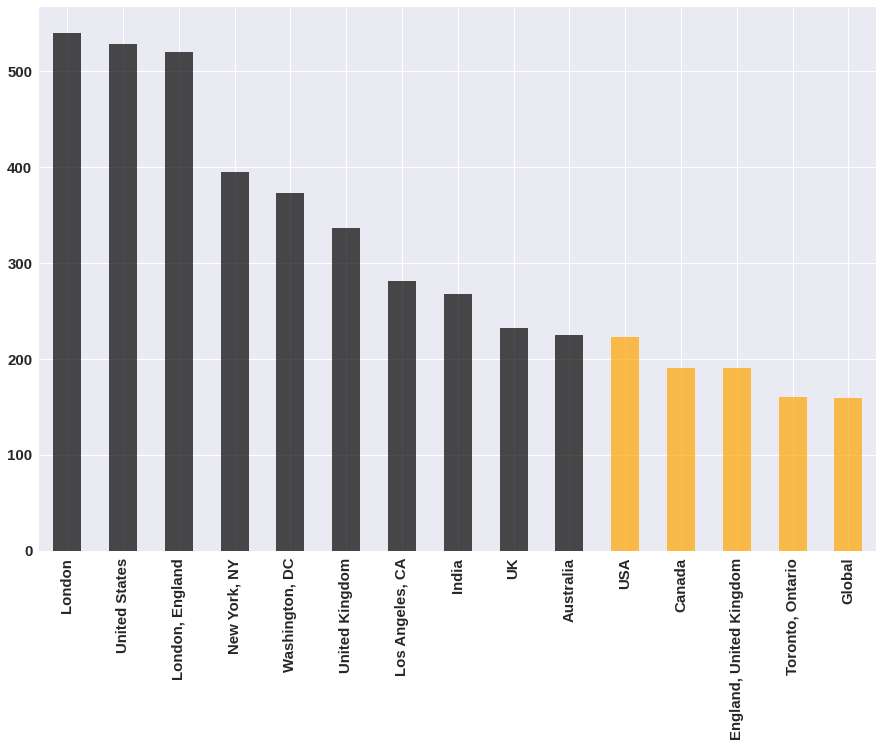

In [79]:
mask = data['Location'].value_counts().index

clrs = ['black' if (x in mask[:10]) else 'orange' for x in mask]


data['Location'].value_counts()[0:15].plot(kind='bar',alpha =0.7,color=clrs);
#plt.xticks(rotation=25)

* Most of the tweets are from UK(London) , USA(New york, Washington dc,Los angeles) and India.

In [80]:
data['TweetAt'].dtype

dtype('O')

In [81]:
data['TweetAt'] = pd.to_datetime(data['TweetAt'])

In [82]:
data['TweetAt'].dtype

dtype('<M8[ns]')

In [83]:
print(f"unique years {data['TweetAt'].dt.year.unique()}")
print(f"unique month {sorted(data['TweetAt'].dt.month.unique())}")
print(f"unique day {sorted(data['TweetAt'].dt.day.unique())}")
print(f"unique day {data['TweetAt'].dt.day_name().unique()}")



unique years [2020]
unique month [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
unique day [4, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
unique day ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


In [84]:
# only one unique year so we are not considering it
data['month'] = data['TweetAt'].dt.month
data['day'] = data['TweetAt'].dt.day
data['day_name'] = data['TweetAt'].dt.day_name()


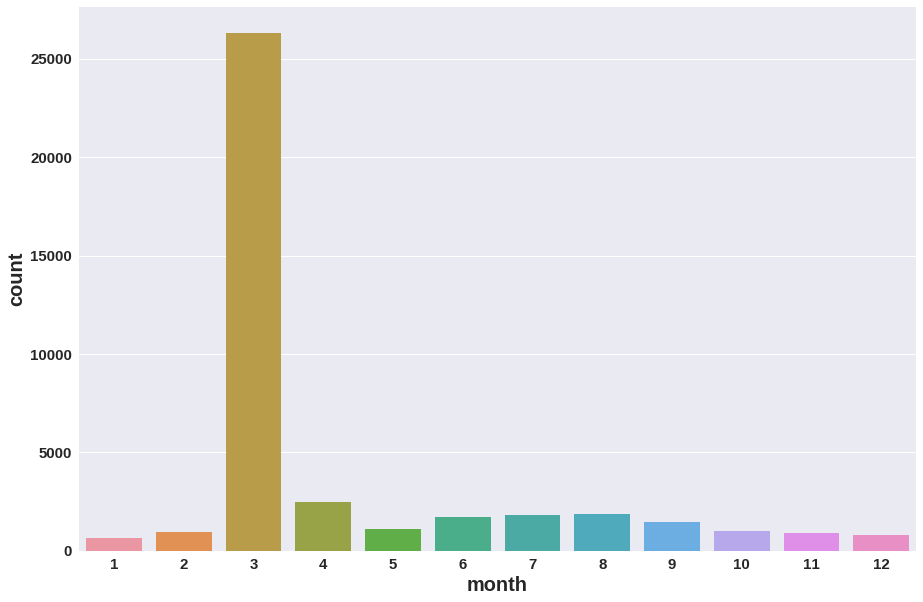

In [85]:
sns.countplot(data['month']);

* Most tweets are from March.
* Corona varius was decleared pandamic in March.

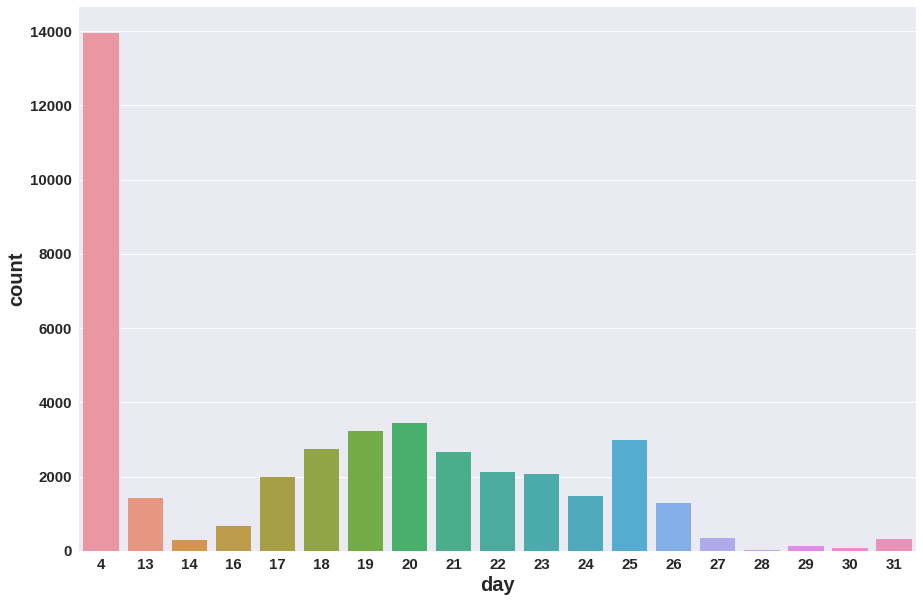

In [86]:
sns.countplot(data['day']);

In [87]:
data[data['month'] != 3]['day'].value_counts()

4     13136
13     1428
14      284
Name: day, dtype: int64

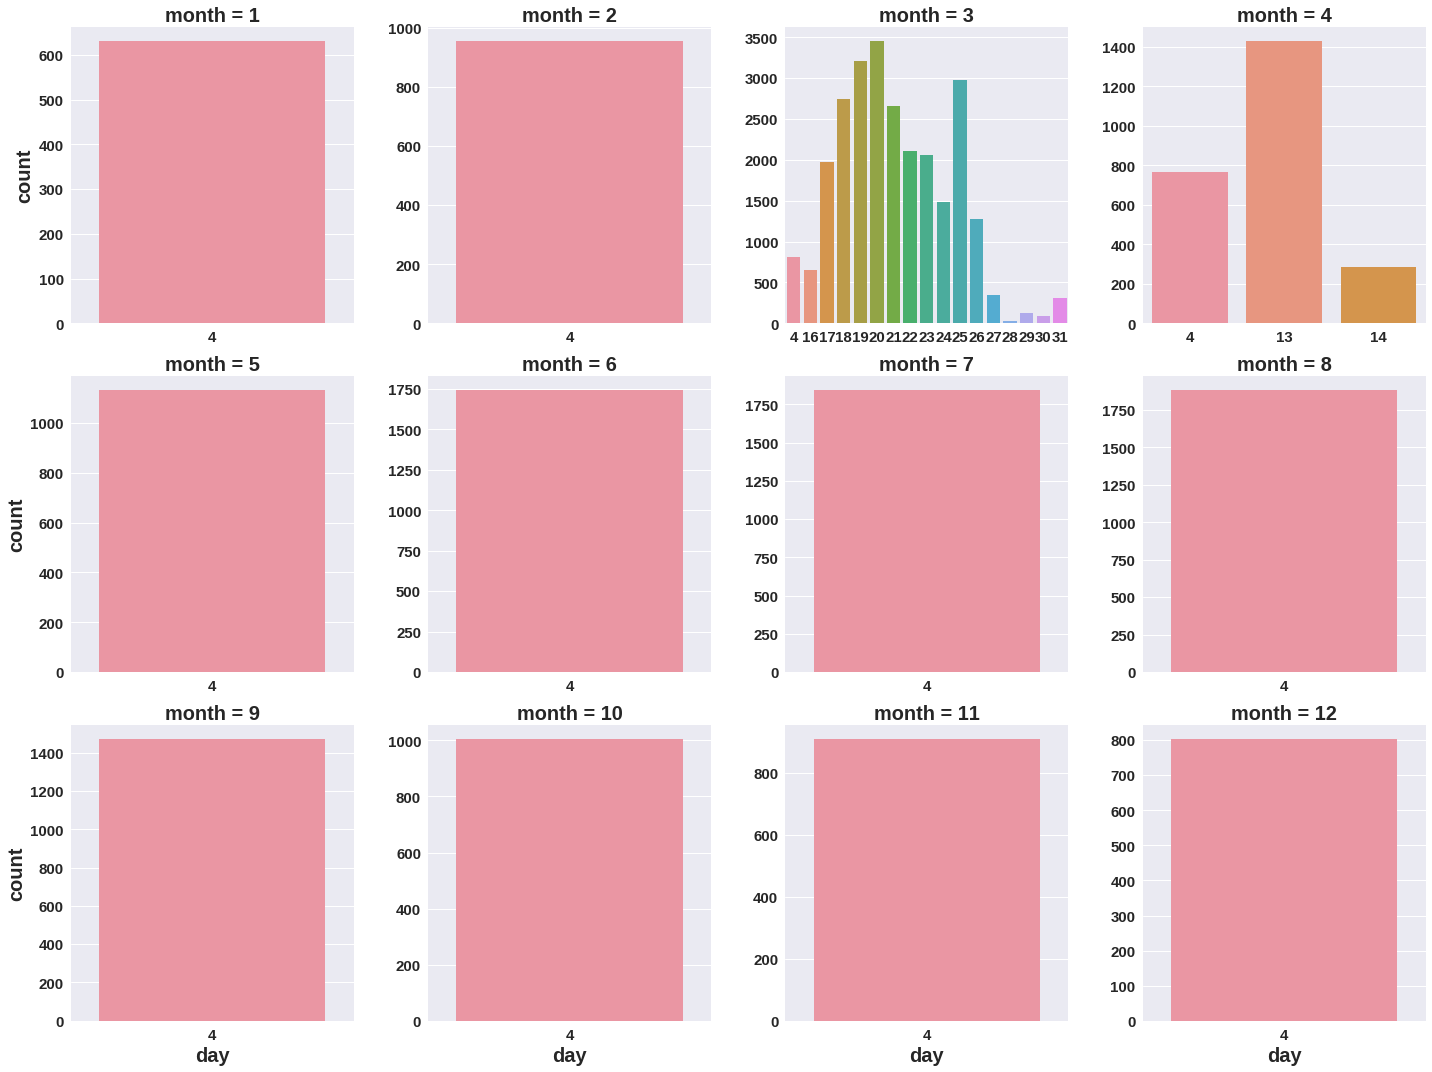

In [88]:
sns.catplot(x= 'day', data=data, col='month',kind='count',col_wrap=4,sharey=False,sharex=False);

* Only in march tweets are there are most number of tweets from 4th to 31st, with 20th being the day when most number of tweets occured.
* april had tweets from 4th,13th and 14th while most number of tweets occured on 13th.
* All other months have tweets only from 4th of the repective month.

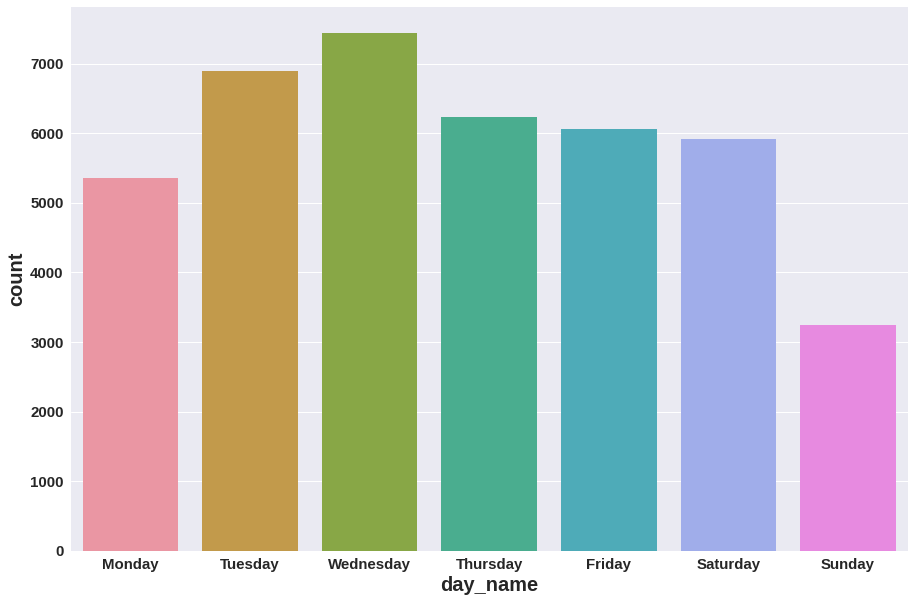

In [89]:
sns.countplot(data['day_name']);

* Most tweets happended during wednesday and least during sunday

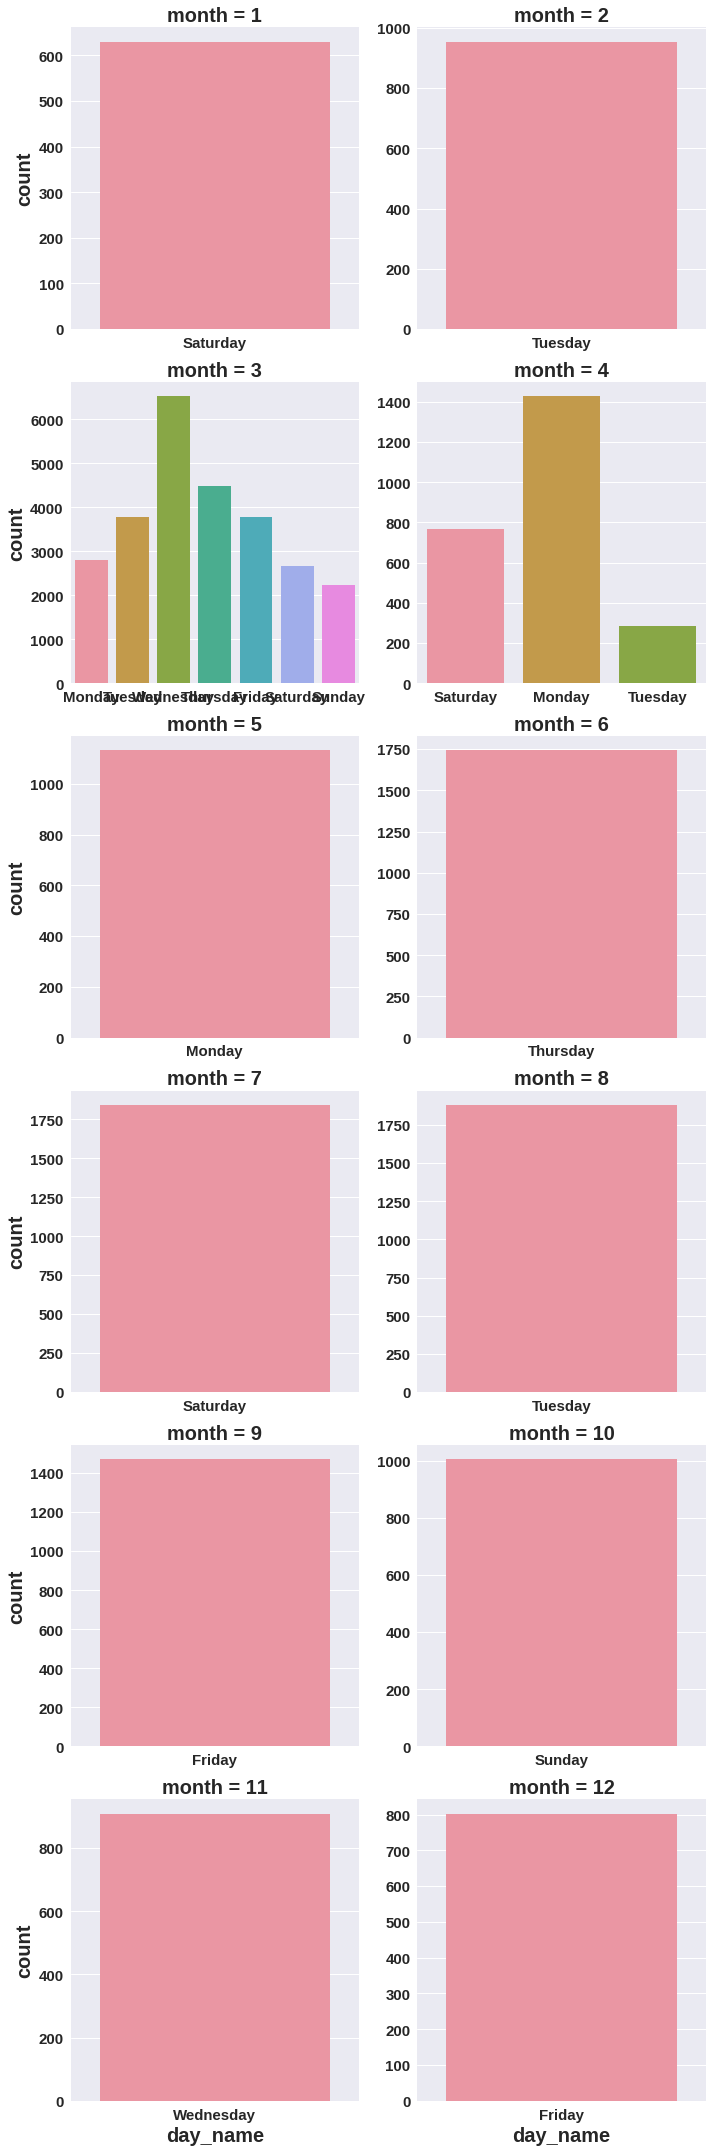

In [90]:
sns.catplot(x= 'day_name', data=data, col='month',kind='count',col_wrap=2,sharey=False,sharex=False)
plt.tight_layout();

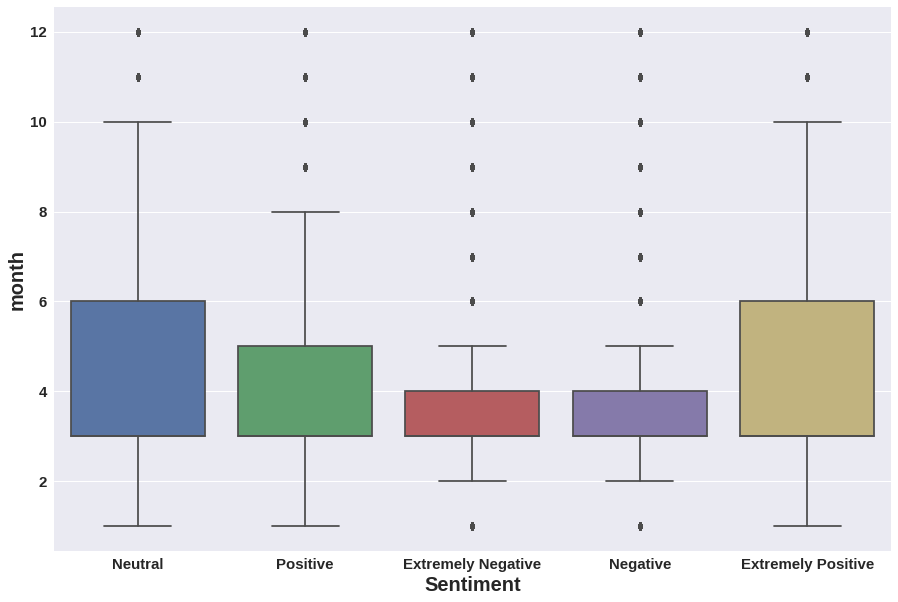

In [91]:
sns.boxplot(data=data, y='month',x='Sentiment');

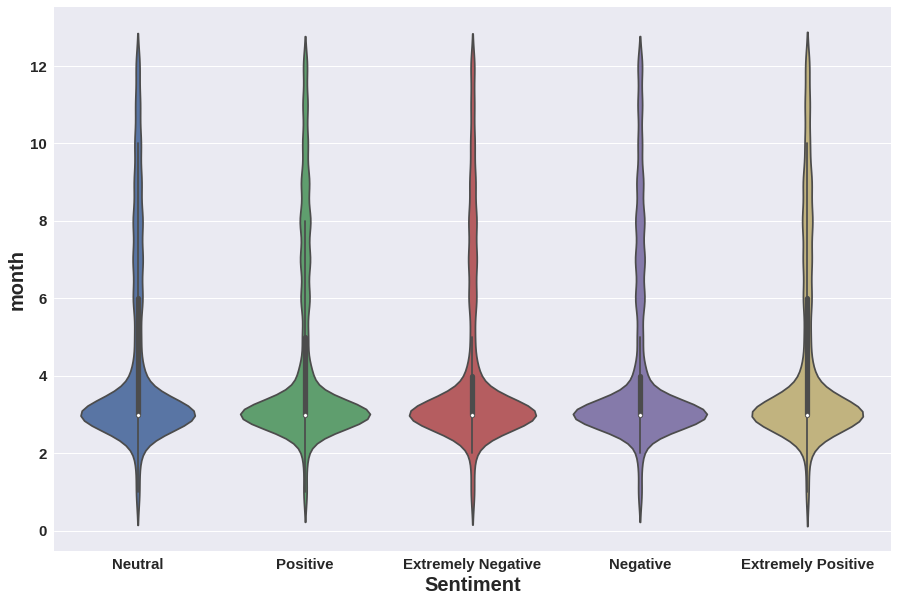

In [92]:
sns.violinplot(data=data, y='month',x='Sentiment');

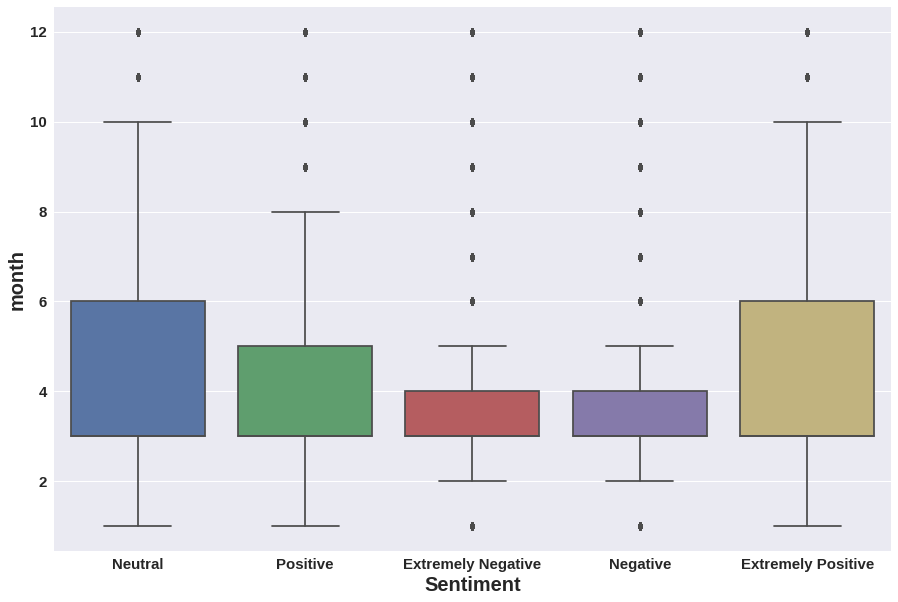

In [93]:
sns.boxplot(data=data, y='month',x='Sentiment');

# **Preprocessing tweets** 

##1. Extracting usernames and removing them from tweet

In [94]:
!pip install neattext

In [95]:
import neattext.functions as nfx

In [96]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [97]:
userhandels = data['OriginalTweet'].apply(nfx.extract_userhandles)

In [98]:
z =[]
for j in range(len(userhandels)) :
  if userhandels[j]:
    for k in range(len(userhandels[j])):
      z.append((userhandels[j][k],data['Sentiment'][j]))

  else:
    continue


In [99]:
userhandels_sentiment_df =pd.DataFrame(z, columns=["userhandel", "sentiment"])


In [100]:
userhandels_sentiment_df['userhandel'].nunique()

10950

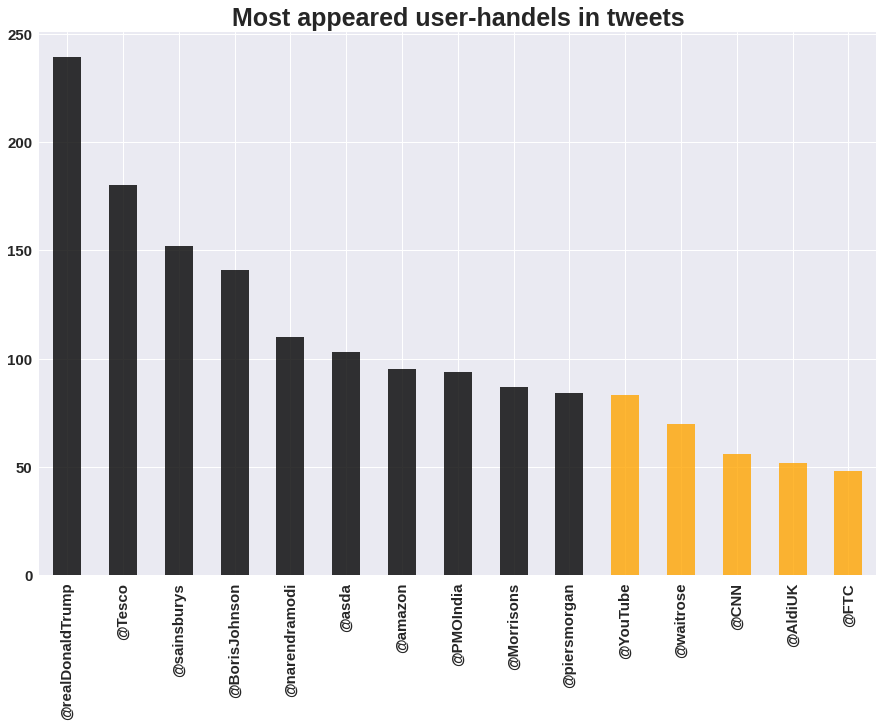

In [101]:
userhandels_sentiment_df['userhandel'].value_counts()[0:15].plot(kind='bar',alpha =0.8,color=clrs)
plt.title('Most appeared user-handels in tweets');



* Most occurred userhandels are @realDonaldTrump,@Tesco,@sainsbury,@BorisJohnson and @narendramodi.

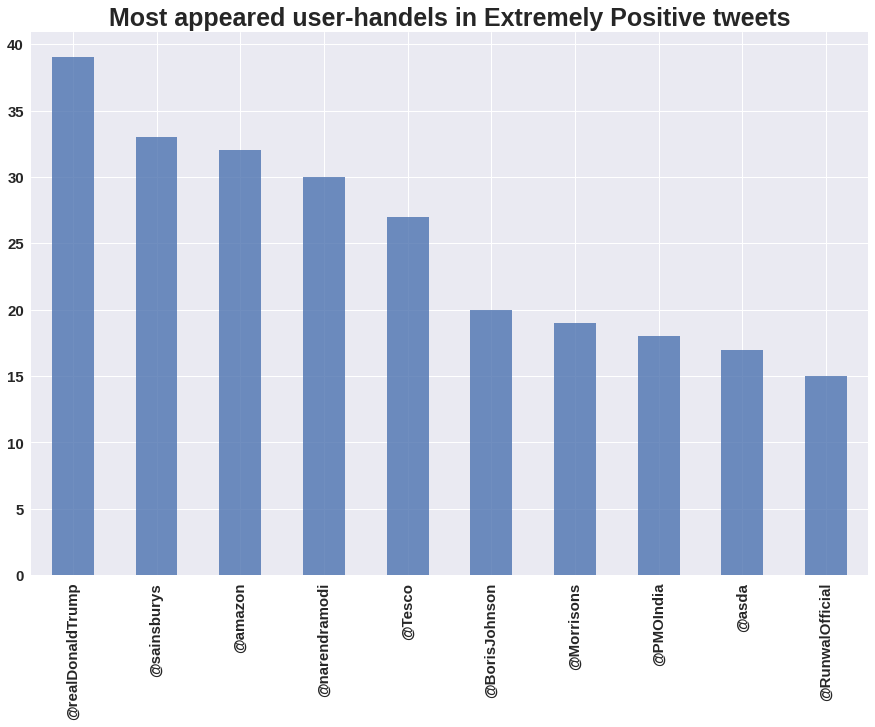

In [102]:
userhandels_sentiment_df[userhandels_sentiment_df['sentiment']=='Extremely Positive']['userhandel'].value_counts()[0:10].plot(kind='bar',alpha=0.8)
plt.title('Most appeared user-handels in Extremely Positive tweets');


* Userhandels in extremely positive tweets are @realDonaldTrump,@sainsburys,@amazon,@narendramodi and @Tesco.

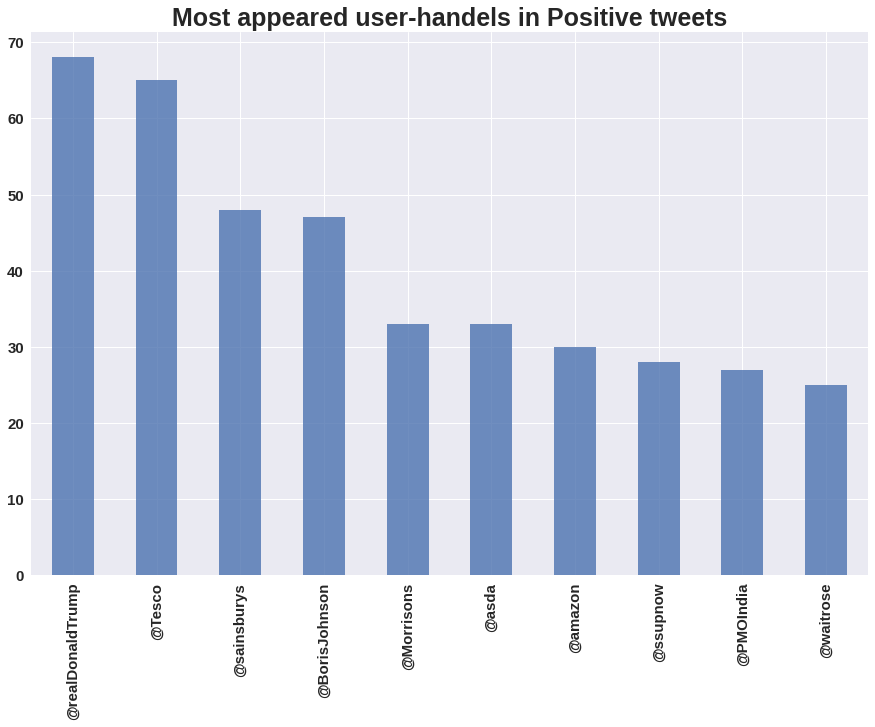

In [103]:
userhandels_sentiment_df[userhandels_sentiment_df['sentiment']=='Positive']['userhandel'].value_counts()[0:10].plot(kind='bar',alpha=0.8)
plt.title('Most appeared user-handels in Positive tweets');


* Userhandels in positive tweets are @realDonaldTrump, @Tesco, @sainsburys,@BorisJhonson and @Morrisons.

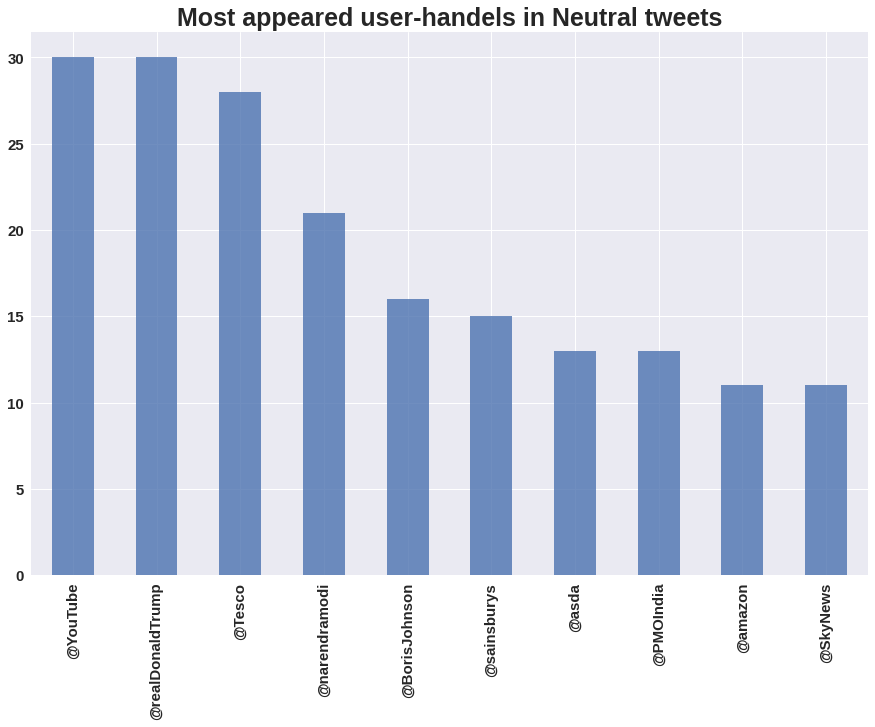

In [104]:
userhandels_sentiment_df[userhandels_sentiment_df['sentiment']=='Neutral']['userhandel'].value_counts()[0:10].plot(kind='bar',alpha=0.8)
plt.title('Most appeared user-handels in Neutral tweets');


* Userhandels in neutral tweets are @YouTube, @realDonaldTrump, @Tesco, @narendrmodi and @BorisJhonson. 

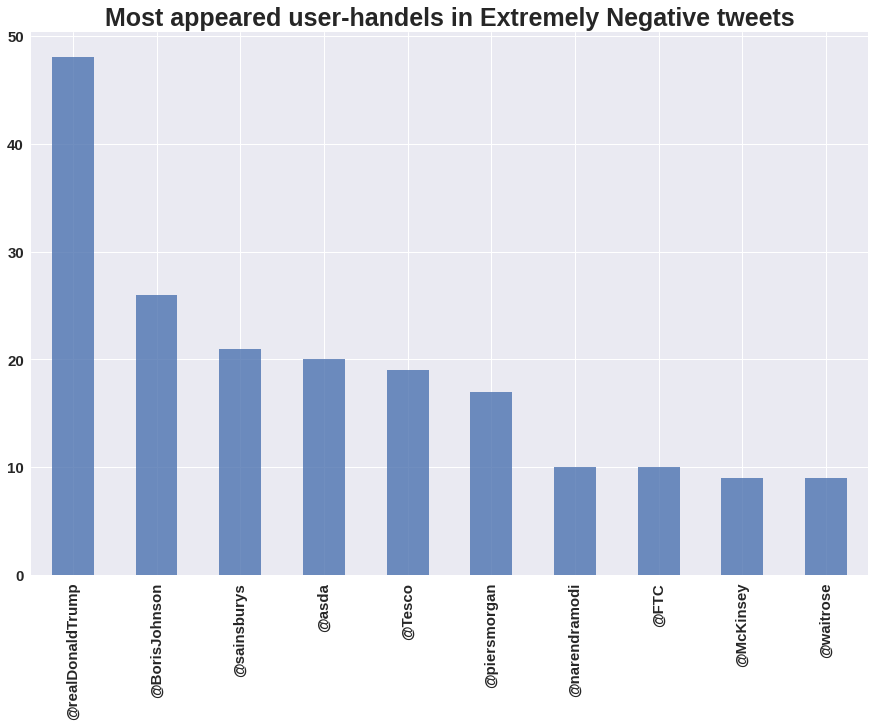

In [105]:
userhandels_sentiment_df[userhandels_sentiment_df['sentiment']=='Extremely Negative']['userhandel'].value_counts()[0:10].plot(kind='bar',alpha=0.8)
plt.title('Most appeared user-handels in Extremely Negative tweets');



* Userhandels in extremely negative tweets are @realDonaldTrump, @BorisJhonson @sainsburys, @asda and @Tesco.

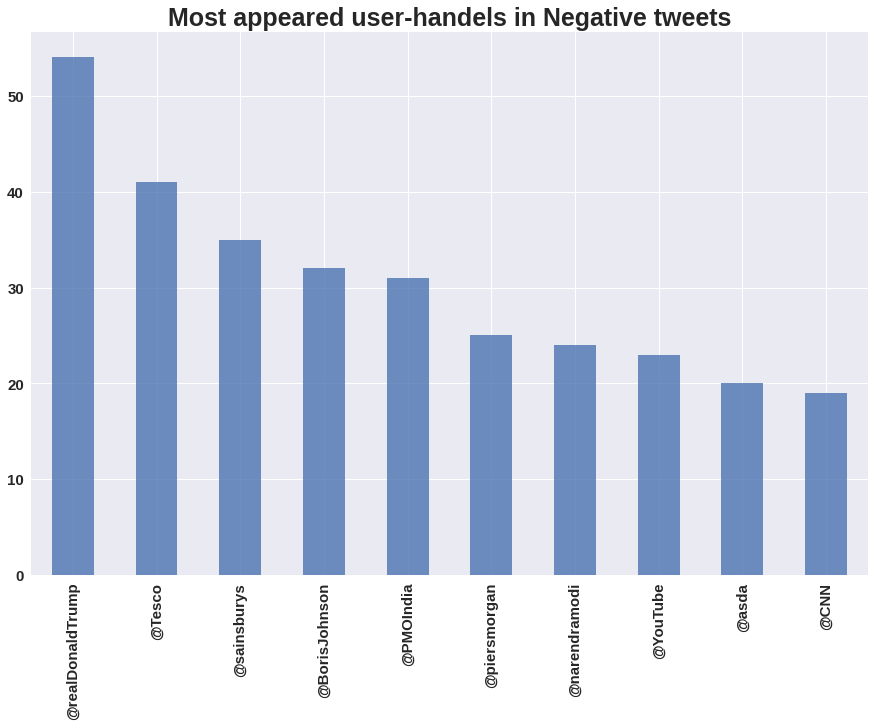

In [106]:
userhandels_sentiment_df[userhandels_sentiment_df['sentiment']=='Negative']['userhandel'].value_counts()[0:10].plot(kind='bar',alpha=0.8)
plt.title('Most appeared user-handels in Negative tweets');


* Userhandels in negative tweets are @realDonaldTrump, @Tesco, @sainsburys, @BorisJhonson and @PMOIndia.

In [107]:
data['clean_tweet'] = data['OriginalTweet'].apply(nfx.remove_userhandles)

### 2. Removing urls

In [108]:
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_urls)

In [109]:
data.loc[:,['OriginalTweet','clean_tweet']].sample(3)

OriginalTweet  \
30698  Record month for supermarkets as consumers spend extra Â£1.9bn\r\r\n\r\r\n@TheShareCentre comments on the current UK supermarket landscape amid the current Covid-19 crisis\r\r\n\r\r\nhttps://t.co/3rdExuGG1m\r\r\n\r\r\n#PressRelease https://t.co/u3p9Je6klE   
28478   End of mass mobility as we know in India.\r\r\nAnything with tightly packed crowds of people is now a health hazard. Permanently reduced demand. What options would a mass mobility ( bus/train/metro) consumer shift to? #coronavirus https://t.co/JXHLHDWjFm   
40797                    One fallout is for sure due to the #COVID2019 #Corona #coronavirusindia pandemic. Thousands of flats in Prime locations in Mumbai and other metros will be up for re-sale at bargain bottom prices. This is a once in a lifetime opportunity.   

                                                                                                                                                                                                                                         clean_tweet  
30698                                            Record month for supermarkets as consumers spend extra Â£1.9bn\r\r\n\r\r\n  comments on the current UK supermarket landscape amid the current Covid-19 crisis\r\r\n\r\r\n\r\r\n\r\r\n#PressRelease   
28478        End of mass mobility as we know in India.\r\r\nAnything with tightly packed crowds of people is now a health hazard. Permanently reduced demand. What options would a mass mobility ( bus/train/metro) consumer shift to? #coronavirus   
40797  One fallout is for sure due to the #COVID2019 #Corona #coronavirusindia pandemic. Thousands of flats in Prime locations in Mumbai and other metros will be up for re-sale at bargain bottom prices. This is a once in a lifetime opportunity.

### 3. Removing numbers

In [110]:
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_numbers)

In [111]:
data.loc[:,['OriginalTweet','clean_tweet']].sample(3)

OriginalTweet  \
19516  Lower inflation projections will be helped by record-low oil prices ($25) &amp; drastic fall in domestic consumption due to COVID-19 led slowdown.\r\r\n\r\r\nIf projected inflation hovers around 8-9% range, then an aggressive RIR stance could allow #SBP room to bring DR ?? to 9% level easily.   
25998                                                                                                                                                                                       I'm on #furlough Â how do I claim 80pc of my pay from the #UK #Government? https://t.co/kjZgm5P6tT #coronavirus   
35553                                                hope COVID 19 will teach us to stop judging people based on their JOB titles or earnings Grocery store workers bus drivers delivery drivers fast food workers garbage collectors sanitation workers etc they are the ones taking us through this crisis   

                                                                                                                                                                                                                                                                                          clean_tweet  
19516  Lower inflation projections will be helped by record-low oil prices ($) &amp; drastic fall in domestic consumption due to COVID- led slowdown.\r\r\n\r\r\nIf projected inflation hovers around -% range, then an aggressive RIR stance could allow #SBP room to bring DR ?? to % level easily.  
25998                                                                                                                                                                                                         I'm on #furlough Â how do I claim pc of my pay from the #UK #Government?  #coronavirus  
35553                                           hope COVID  will teach us to stop judging people based on their JOB titles or earnings Grocery store workers bus drivers delivery drivers fast food workers garbage collectors sanitation workers etc they are the ones taking us through this crisis

###4. Removing special characters (#, /r, /n, -, ?, !, $, Â, (, ), /, * etc

In [112]:
data['clean_tweet'] = data['clean_tweet'].str.lower()

###Exploring hashtags

In [113]:
hashtags = data['clean_tweet'].apply(nfx.extract_hashtags)

In [114]:
z =[]
for j in range(len(hashtags)) :
  if hashtags[j]:
    for k in range(len(hashtags[j])):
      z.append((hashtags[j][k],data['Sentiment'][j]))

  else:
    continue

hashtag_sentiment_df =pd.DataFrame(z, columns=["hashtag", "sentiment"])

Text(0.5, 1.0, 'Most appeared hashtag in tweets')

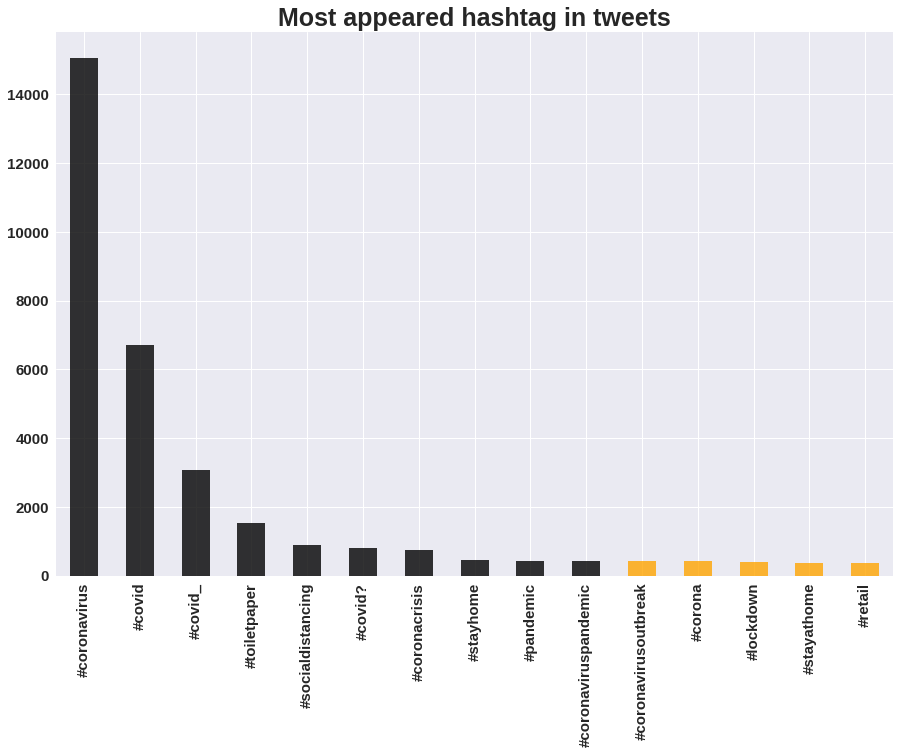

In [115]:
hashtag_sentiment_df['hashtag'].value_counts()[0:15].plot(kind='bar',alpha=0.8,color=clrs);
plt.title('Most appeared hashtag in tweets')


* Most occurred hashtahgs in given tweets are #coronavirus, #covid, #covid_, #toiletpaper and #socialdistancing.

Text(0.5, 1.0, 'Most appeared hashtag in Extremely Positive tweets')

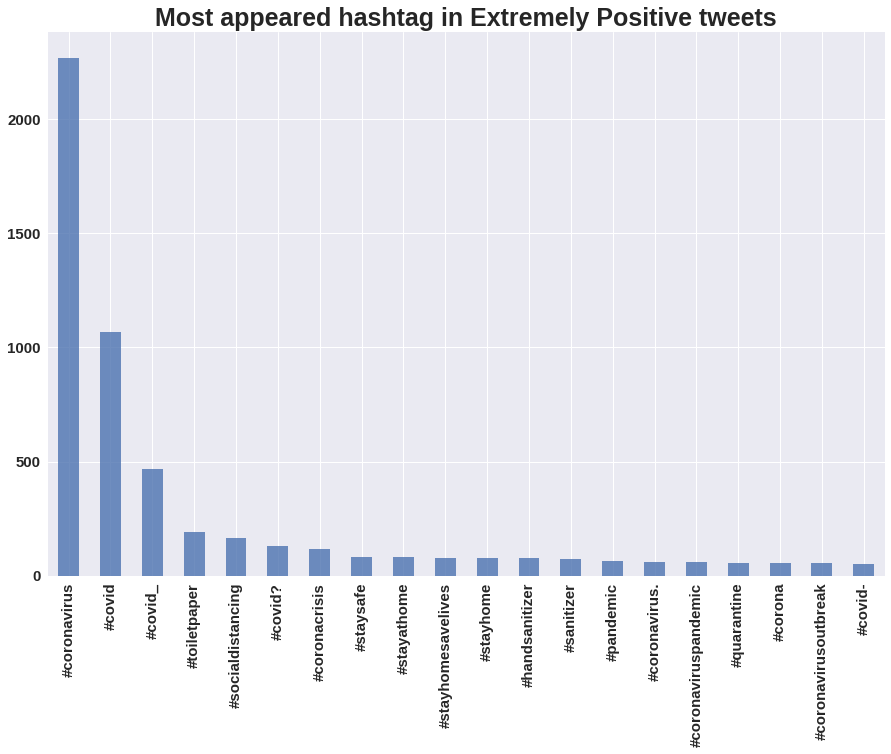

In [116]:
hashtag_sentiment_df[hashtag_sentiment_df['sentiment']=='Extremely Positive']['hashtag'].value_counts()[0:20].plot(kind='bar',alpha=0.8);
plt.title('Most appeared hashtag in Extremely Positive tweets')


* Most occurred hashtahgs with extremely positive sentiment other than corona are #toiletpaper, #socialdistancing, #stayatsafe, #stayhome and #stayhomeandsavelifes.

Text(0.5, 1.0, 'Most appeared hashtag in Positive tweets ')

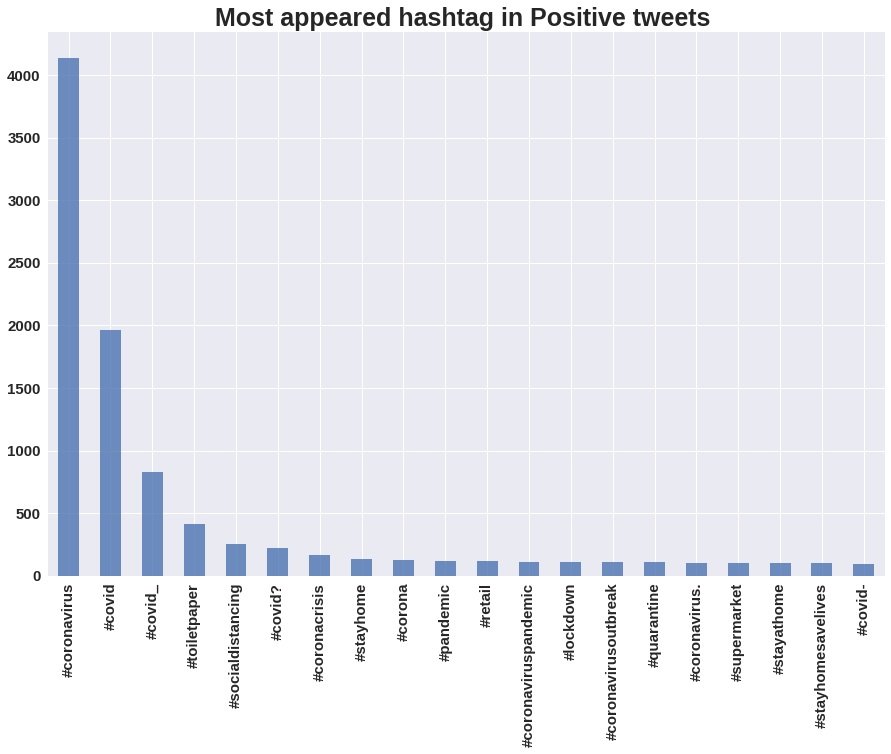

In [117]:
hashtag_sentiment_df[hashtag_sentiment_df['sentiment']=='Positive']['hashtag'].value_counts()[0:20].plot(kind='bar',alpha=0.8);
plt.title('Most appeared hashtag in Positive tweets ')


* Most occurred hashtahgs with positive sentiment other than corona are #toiletpaper, #socialdistancing, #stayhome, #pandamic and #retail.

Text(0.5, 1.0, 'Most appeared hashtag in Neutral tweets')

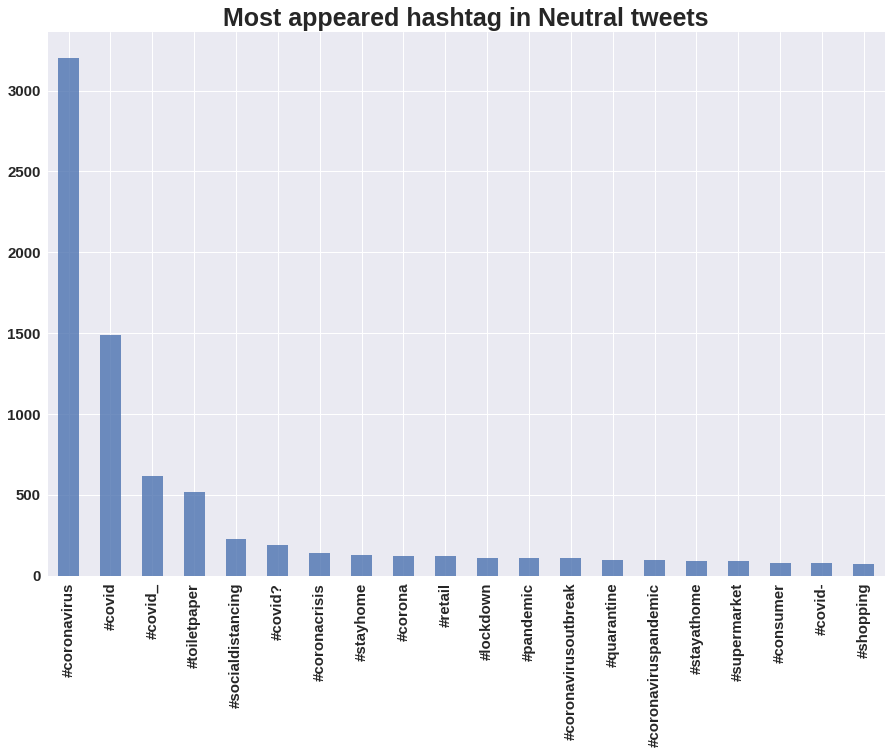

In [118]:
hashtag_sentiment_df[hashtag_sentiment_df['sentiment']=='Neutral']['hashtag'].value_counts()[0:20].plot(kind='bar',alpha=0.8);
plt.title('Most appeared hashtag in Neutral tweets')


* Most occurred hashtahgs with neutral sentiment other than corona are #toiletpaper, #socialdistancing, #stayhome, #etail and #lockdown.

Text(0.5, 1.0, 'Most appeared hashtag Extremely Negative in tweets')

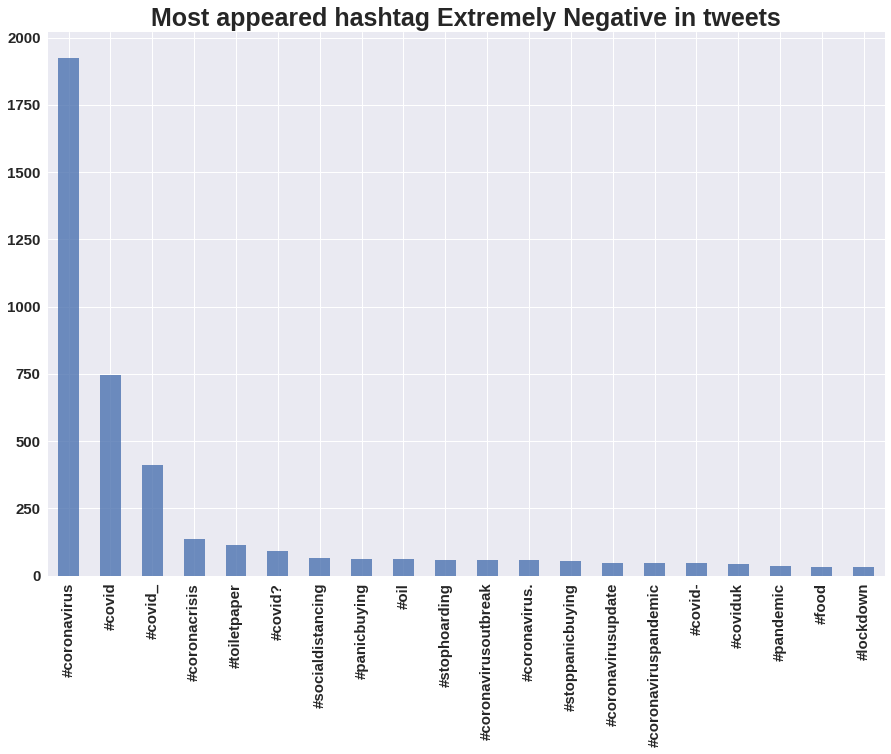

In [119]:
hashtag_sentiment_df[hashtag_sentiment_df['sentiment']=='Extremely Negative']['hashtag'].value_counts()[0:20].plot(kind='bar',alpha=0.8);
plt.title('Most appeared hashtag Extremely Negative in tweets')


* Most occurred hashtahgs with extremely negative sentiment other than corona are #toiletpaper, #socialdistancing, #panicbuying, #oil and #stophoarding.

Text(0.5, 1.0, 'Most appeared hashtag in Negative tweets')

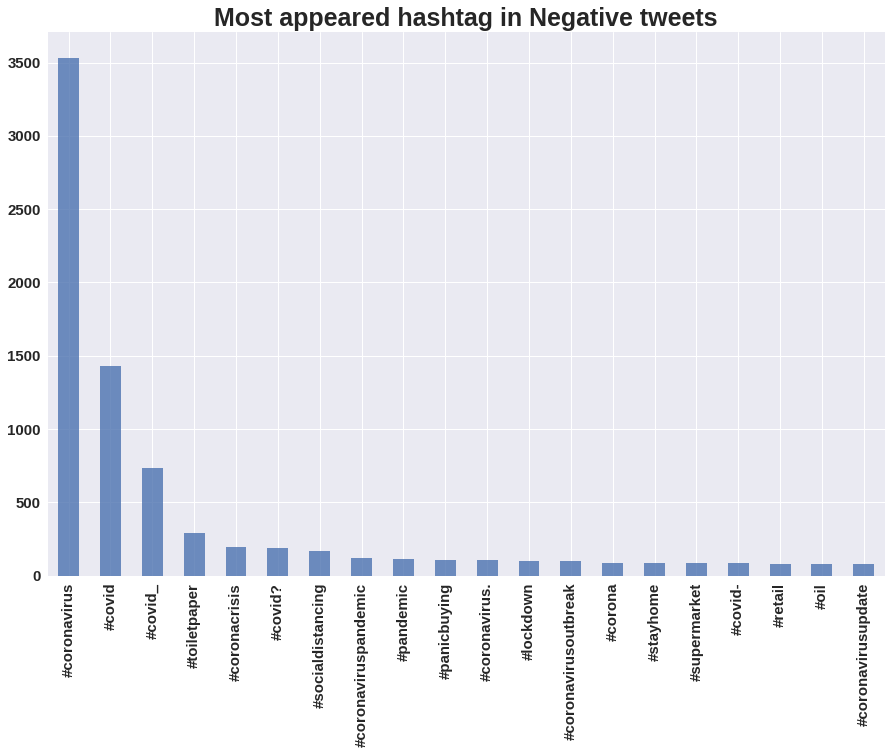

In [120]:
hashtag_sentiment_df[hashtag_sentiment_df['sentiment']=='Negative']['hashtag'].value_counts()[0:20].plot(kind='bar',alpha=0.8);
plt.title('Most appeared hashtag in Negative tweets')


* Most occurred hashtahgs with negative sentiment other than corona are #toiletpaper, #socialdistancing,#pandamic, #panicbuying and #lockdown.

In [121]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x : nfx.replace_special_characters(x,replace_with='  '))

In [122]:
data.loc[:,['OriginalTweet','clean_tweet']].sample(5)

OriginalTweet  \
35951                          @ssupnow 1.Sanitizer\r\r\n2.Italy \r\r\n3.Wuhan \r\r\n4. Grocery\r\r\n\r\r\n#coronavirus #covid19 #contest #alert #GiveawayAlert #competition #puzzle \r\r\n\r\r\n@ssupnow\r\r\n\r\r\nJoin here friends\r\r\n@MayurMa46334426 \r\r\n@Rohith8977 \r\r\n@pppppiya \r\r\n@cuteushakumari \r\r\n@Rupalpiya   
25274  Selling my extra garden SEEDS if anyone needs seeds. Start GROWING to limit any grocery store panic &amp; food chain shortages! More seeds soon!\r\r\n#gardening #Quarantine\r\r\n#shop #Coronavirus\r\r\n#grow #Quarantine\r\r\n#COVID?19 #Corona #COVID19 #lockdown\r\r\n#StayHome #plant\r\r\n\r\r\nhttps://t.co/hWq4LutVkb   
33756                                                                                                                                                                  #coronavirus\r\r\nALL OF THIS IS FAKE FOOD AND DRINKS! My husband went to the grocery store and took this pic of all fake stuff. WTF?? https://t.co/FYzQ6AeLUu   
2207                                            Why aren't supermarket workers being required to where gloves or even masks when handling food? As far as I know they havent.won't that still help spread the virus as we get our essential food items? #COVID2019 can survive on cardboard for 24+ hours, right? @CDCgov #Quarantine   
9609                                                                                                                                                                                                                                        Obamacare is turning 10 years old amid the pandemic Has the law helped Illinois consumers   

                                                                                                                                                                                                                                                                               clean_tweet  
35951                                                                                                                          sanitizer  italy   wuhan    grocery  coronavirus   covid   contest   alert   giveawayalert   competition   puzzle      join here friends                     
25274          selling my extra garden seeds if anyone needs seeds   start growing to limit any grocery store panic   amp   food chain shortages   more seeds soon  gardening   quarantine  shop   coronavirus  grow   quarantine  covid     corona   covid   lockdown  stayhome   plant    
33756                                                                                                                                                 coronavirus  all of this is fake food and drinks   my husband went to the grocery store and took this pic of all fake stuff   wtf     
2207   why aren  t supermarket workers being required to where gloves or even masks when handling food   as far as i know they havent  won  t that still help spread the virus as we get our essential food items     covid can survive on cardboard for    hours   right       quarantine  
9609                                                                                                                                                                                               obamacare is turning  years old amid the pandemic has the law helped illinois consumers

In [123]:
# HTML doesn't recognize the '&' but it will recognize &amp; because it is equal to & in HTML hence & is decoded as &amp in tweets pulled down.
data['clean_tweet'] = data['clean_tweet'].apply(lambda x : nfx.replace_term(x,'amp',' '))


### 5. Removing multiple whitespaces

In [124]:
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_multiple_spaces)

###6. Removing short words

In [125]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_shortwords(x,length=2))

### 7. Removing stop words

In [126]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_stopwords(x,lang='en'))

###8.Tokenization

In [127]:
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())

In [128]:
tokenized_tweet.sample(3)

36421    [careful, guys, spray, hand, sanitizer, things, coronavirusoutbreak, coronakrise, pandemia, corona, coronavirus, covid, covidiot, covid, coronavirus, decontamination, sanitise, coronavarkenruhhalim]
16457                                                                                                                         [prices, things, going, high, sanitizers, imagine, days, covid, omwanvu, wakuffa]
9188                                                  [like, know, stock, jared, dumped, daddy, telling, country, coronavirus, dem, hoax, way, tell, average, everyday, american, thankful, food, supply, chai]
Name: clean_tweet, dtype: object

###9.Stemming

In [129]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [130]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [131]:
data['clean_tweet'] = tokenized_tweet

# **Generating story**

In [132]:
from wordcloud import WordCloud

In [133]:
all_words = ' '.join(text for text in data['clean_tweet'])

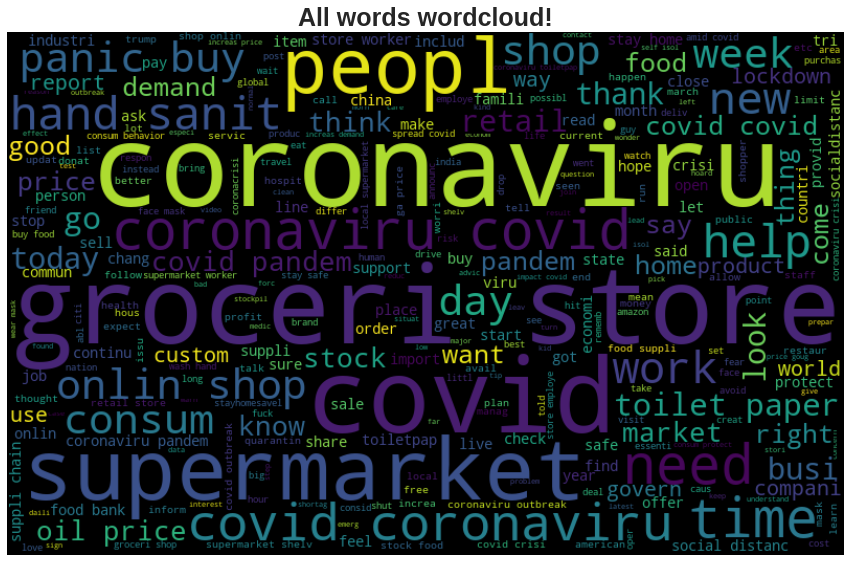

In [134]:
all_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(all_words)

plt.title('All words wordcloud!')
plt.imshow(all_words_cloud, interpolation="bilinear")
plt.axis('off');

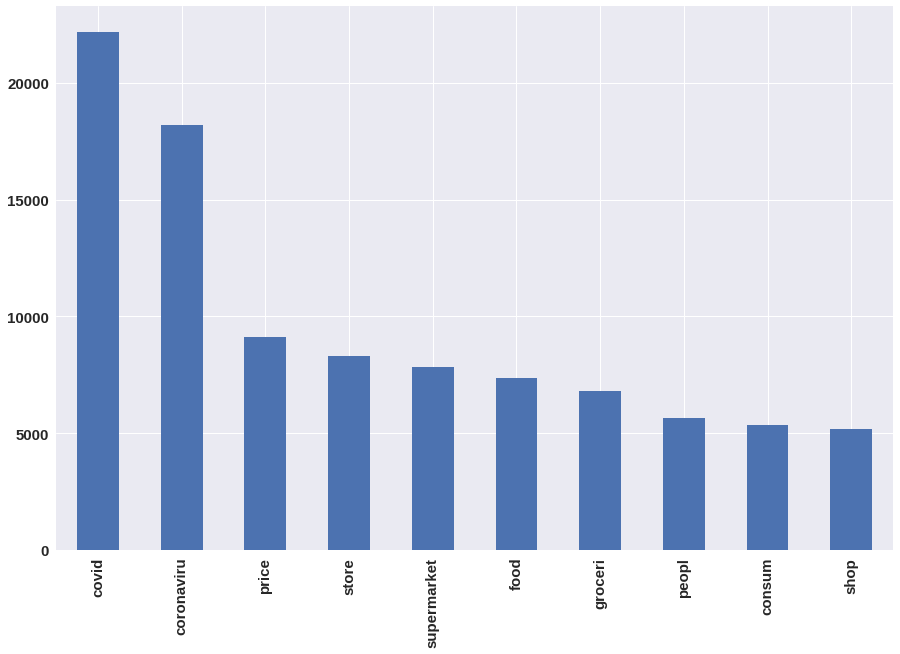

In [135]:
pd.Series(all_words.split()).value_counts()[0:10].plot(kind='bar');

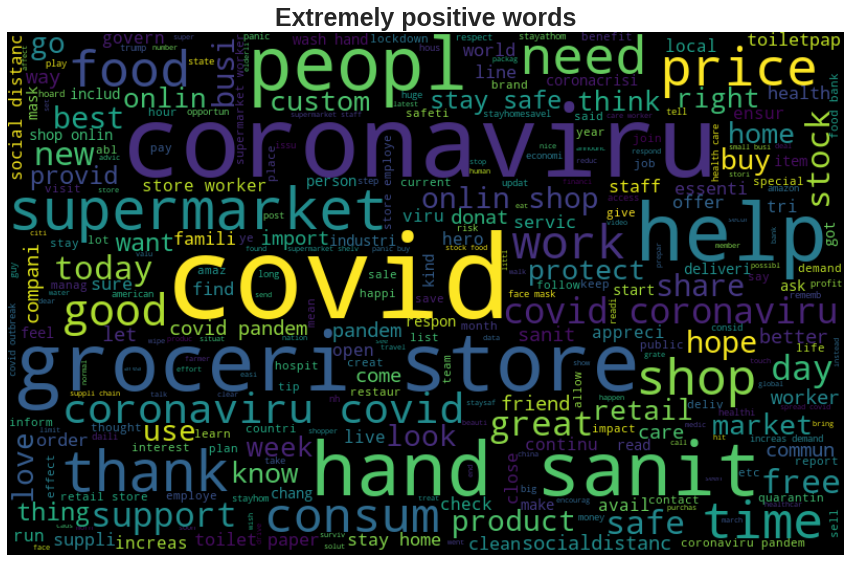

In [136]:
extremly_positive_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Positive']['clean_tweet'])


extremly_positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_positive_words)

plt.title('Extremely positive words')
plt.imshow(extremly_positive_words_cloud, interpolation="bilinear")
plt.axis('off');

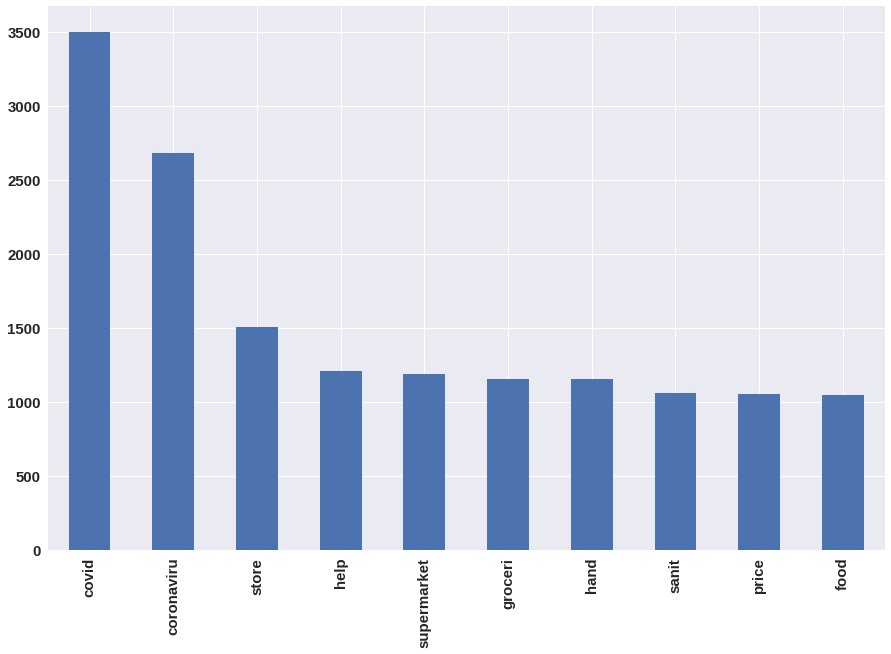

In [137]:
pd.Series(extremly_positive_words.split()).value_counts()[0:10].plot(kind='bar');

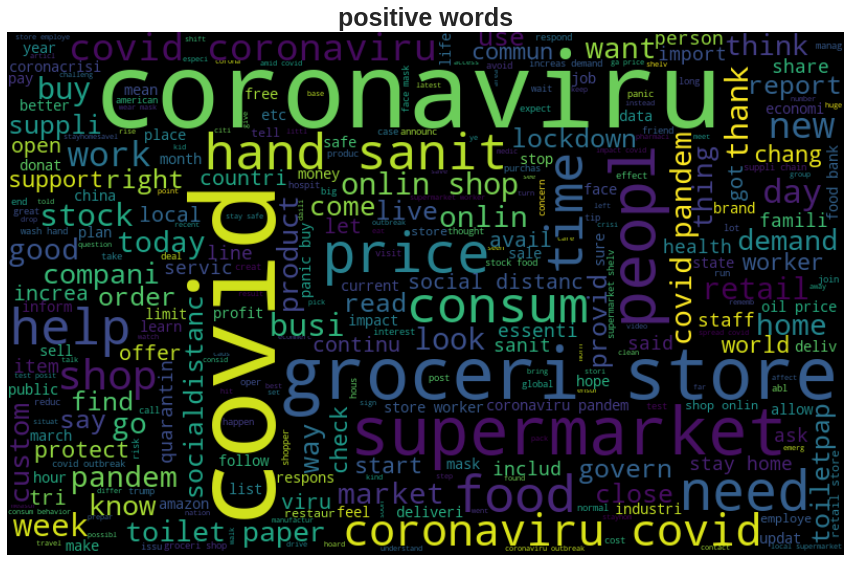

In [138]:
positive_words = ' '.join(text for text in data[data['Sentiment']=='Positive']['clean_tweet'])


positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(positive_words)

plt.title('positive words')
plt.imshow(positive_words_cloud, interpolation="bilinear")
plt.axis('off');

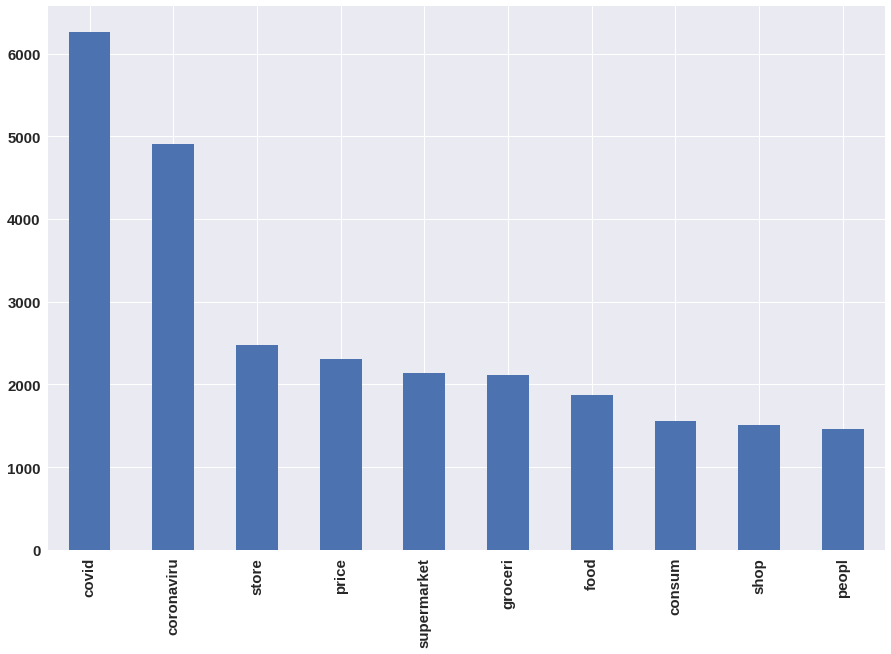

In [139]:
pd.Series(positive_words.split()).value_counts()[0:10].plot(kind='bar');

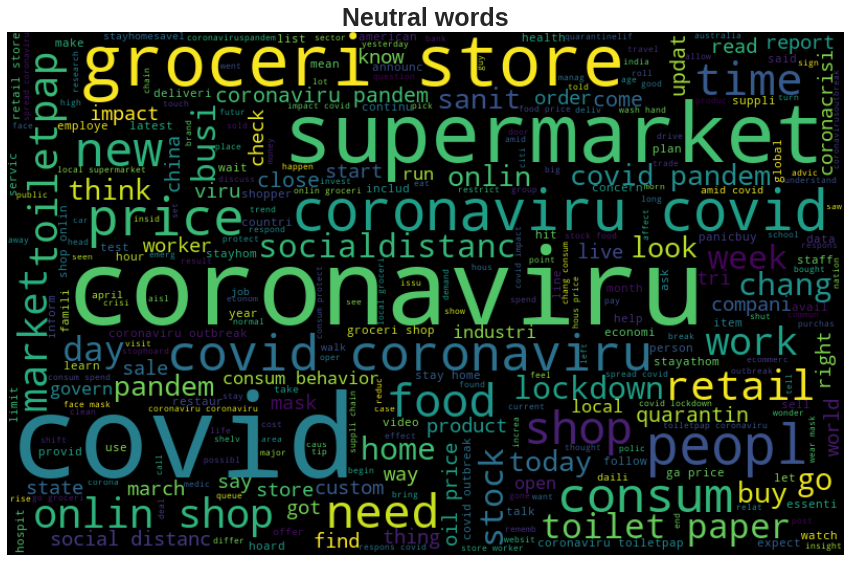

In [140]:
neutral_words = ' '.join(text for text in data[data['Sentiment']=='Neutral']['clean_tweet'])


neutral_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(neutral_words)

plt.title('Neutral words')
plt.imshow(neutral_words_cloud, interpolation="bilinear")
plt.axis('off');

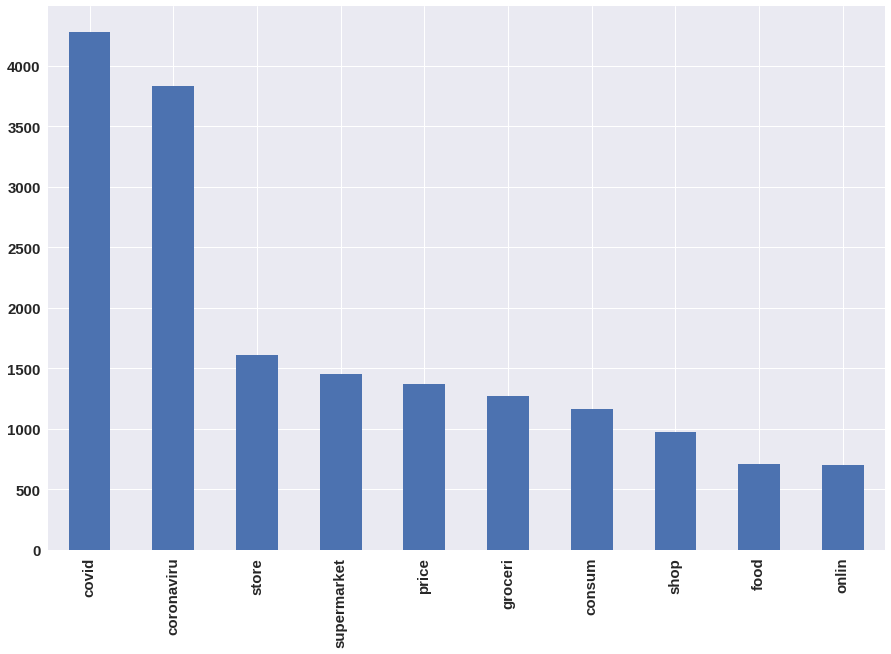

In [141]:
pd.Series(neutral_words.split()).value_counts()[0:10].plot(kind='bar');

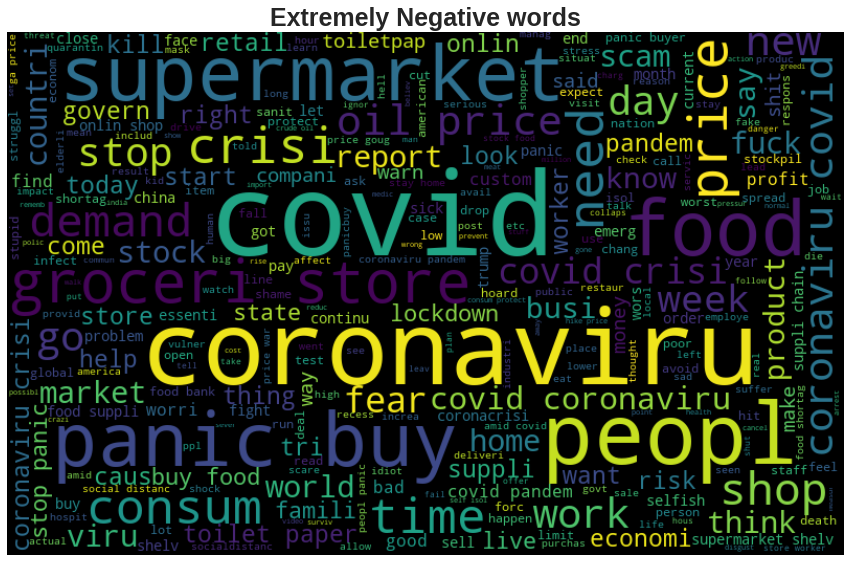

In [142]:
extremly_negative_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Negative']['clean_tweet'])


extremly_negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_negative_words)

plt.title('Extremely Negative words')
plt.imshow(extremly_negative_words_cloud, interpolation="bilinear")
plt.axis('off');

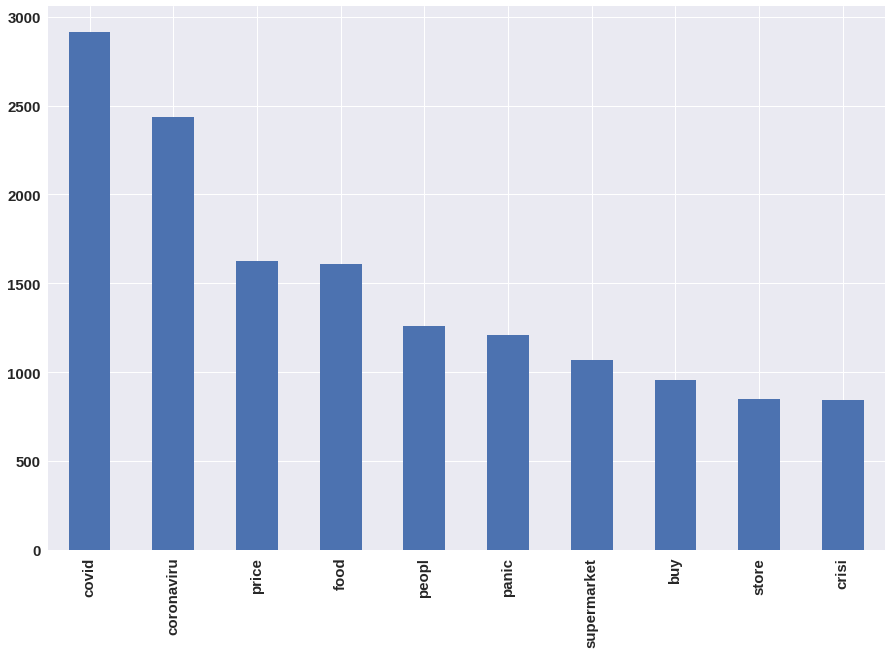

In [143]:
pd.Series(extremly_negative_words.split()).value_counts()[0:10].plot(kind='bar');

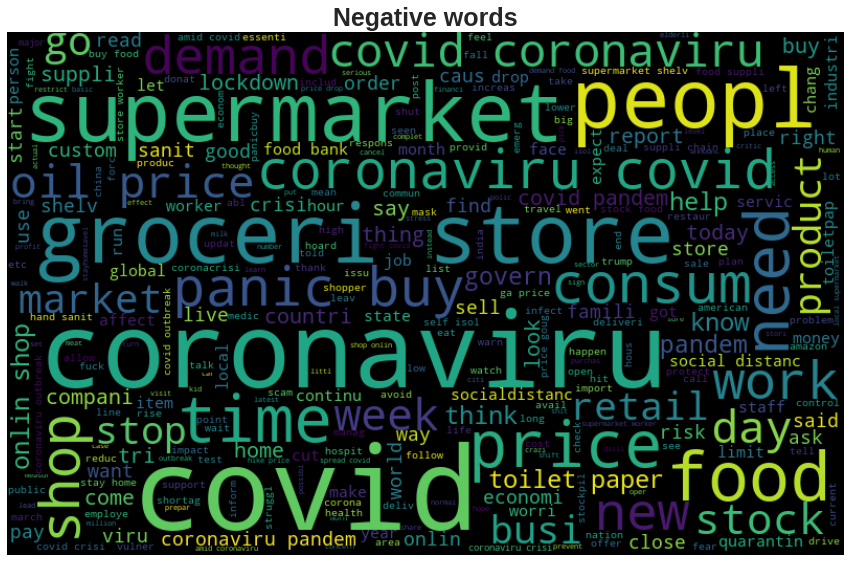

In [144]:
negative_words = ' '.join(text for text in data[data['Sentiment']=='Negative']['clean_tweet'])


negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(negative_words)

plt.title('Negative words')
plt.imshow(negative_words_cloud, interpolation="bilinear")
plt.axis('off');

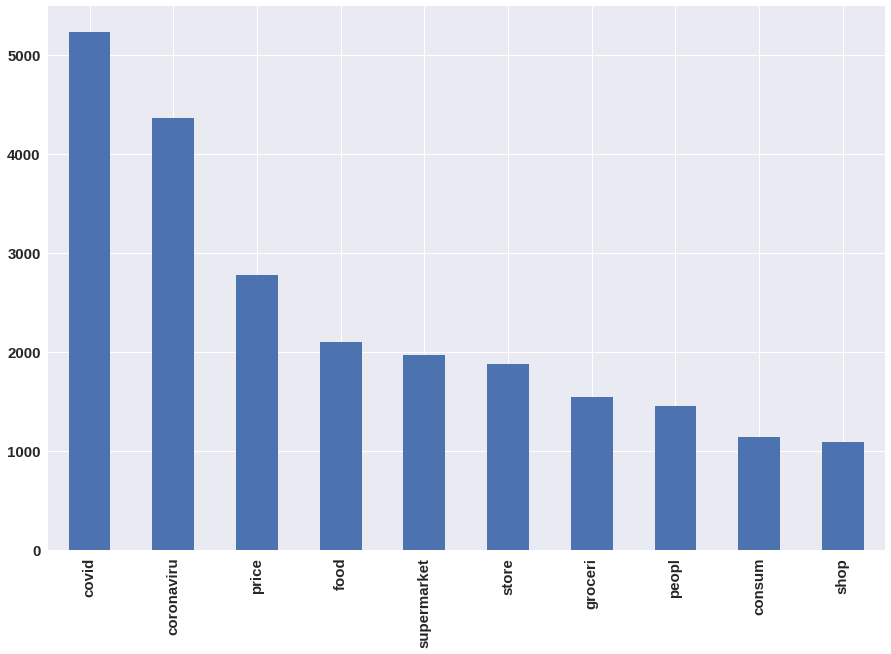

In [145]:
pd.Series(negative_words.split()).value_counts()[0:10].plot(kind='bar');

#**`Model fitting`**

In [146]:
data.sample(3)

UserName  ScreenName                Location    TweetAt  \
23506     27305       72257       San Diego, Calif. 2020-03-26   
20281     24080       69032  Dundee, United Kingdom 2020-03-24   
27499     31298       76250                     NaN 2020-03-04   

                                                                                                                                                                                                                                   OriginalTweet  \
23506                                                                                                      Sorry, #millennials: A #coronavirus-induced #recession wonÂt help you buy a house https://t.co/7d19EiMDeK via @Curbed #housingmarket   
20281  According to Ipsos MORI, 50% of Chinese and 31% of Italian consumers say theyÂre shopping online Âmore frequentlyÂ to purchase products theyÂd usually buy in-store during the ongoing #coronavirus outbreak. https://t.co/xc0L0XEFqv   
27499                                                                                                     .@BedBathBeyond extends store closures until May 2. #retail #coronavirus #bedbathbeyond #housewares #homeworld https://t.co/7allSlnXrU   

                Sentiment  month  day   day_name  \
23506  Extremely Positive      3   26   Thursday   
20281             Neutral      3   24    Tuesday   
27499            Positive      3    4  Wednesday   

                                                                                                               clean_tweet  
23506                                                   sorri millenni coronaviru induc recess help buy hous housingmarket  
20281  accord ipso mori chines italian consum shop onlin frequent purchas product usual buy store ongo coronaviru outbreak  
27499                                               extend store closur retail coronaviru bedbathbeyond housewar homeworld

In [147]:
data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet','day','day_name','month'],axis =1,inplace=True)

In [148]:
X = data['clean_tweet']
y = data['Sentiment']

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [150]:
print(f'train shape { X_train.shape} and { y_train.shape} ')
print(f'train shape { X_test.shape} and { y_test.shape} ')

train shape (32925,) and (32925,) 
train shape (8232,) and (8232,) 


In [151]:
data['clean_tweet'].isnull().sum()

0

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)



#**Multiclass classification**

In [153]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

### Naive bayes


In [154]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.6951860288534548
Validation accuracy Score :  0.46659378036929056
                    precision    recall  f1-score   support

Extremely Negative       0.35      0.60      0.44       642
Extremely Positive       0.40      0.59      0.48       903
          Negative       0.50      0.41      0.45      2413
           Neutral       0.34      0.66      0.45       788
          Positive       0.61      0.40      0.49      3486

          accuracy                           0.47      8232
         macro avg       0.44      0.53      0.46      8232
      weighted avg       0.51      0.47      0.47      8232



### KNN

In [155]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy[i]) 
print(test_accuracy[i] )

0.3168109339407745
0.25826044703595724


### stochastic gradient descent

In [156]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.8371146545178436
Validation accuracy Score :  0.565597667638484
                    precision    recall  f1-score   support

Extremely Negative       0.69      0.65      0.67      1157
Extremely Positive       0.67      0.65      0.66      1360
          Negative       0.37      0.51      0.43      1448
           Neutral       0.74      0.58      0.65      1964
          Positive       0.50      0.50      0.50      2303

          accuracy                           0.57      8232
         macro avg       0.59      0.58      0.58      8232
      weighted avg       0.59      0.57      0.57      8232



### XGboost

In [157]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier(tree_method='hist')

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.4913591495823842
Validation accuracy Score :  0.4655004859086492
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.61      0.47       695
Extremely Positive       0.38      0.69      0.49       727
          Negative       0.41      0.43      0.42      1866
           Neutral       0.50      0.45      0.48      1731
          Positive       0.58      0.41      0.48      3213

          accuracy                           0.47      8232
         macro avg       0.45      0.52      0.47      8232
      weighted avg       0.49      0.47      0.47      8232



### Support vector machines

In [158]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.8996507213363706
Validation accuracy Score :  0.597424684159378
                    precision    recall  f1-score   support

Extremely Negative       0.48      0.75      0.58       705
Extremely Positive       0.52      0.78      0.62       880
          Negative       0.56      0.53      0.54      2115
           Neutral       0.71      0.64      0.67      1710
          Positive       0.66      0.53      0.59      2822

          accuracy                           0.60      8232
         macro avg       0.58      0.64      0.60      8232
      weighted avg       0.61      0.60      0.60      8232



### Logistic regression

In [159]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.8866514806378132
Validation accuracy Score :  0.6026482021379981
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.69      0.64       951
Extremely Positive       0.61      0.70      0.65      1157
          Negative       0.52      0.54      0.53      1905
           Neutral       0.71      0.62      0.67      1767
          Positive       0.60      0.56      0.58      2452

          accuracy                           0.60      8232
         macro avg       0.61      0.62      0.61      8232
      weighted avg       0.61      0.60      0.60      8232



In [160]:
!pip install catboost


     |████████████████████████████████| 76.1 MB 1.2 MB/s 


### CatBoost

In [161]:
from catboost import CatBoostClassifier
CatBoost = CatBoostClassifier()
CatBoost.fit(X_train,y_train)
catboost_prediction = CatBoost.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",CatBoost.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

Learning rate set to 0.094562
0:	learn: 1.5858234	total: 1.07s	remaining: 17m 48s
1:	learn: 1.5640497	total: 2.45s	remaining: 20m 22s
2:	learn: 1.5459749	total: 4.62s	remaining: 25m 36s
3:	learn: 1.5311216	total: 6.66s	remaining: 27m 37s
4:	learn: 1.5179703	total: 8.64s	remaining: 28m 39s
5:	learn: 1.5058827	total: 10.4s	remaining: 28m 41s
6:	learn: 1.4959908	total: 11.3s	remaining: 26m 39s
7:	learn: 1.4859543	total: 12.1s	remaining: 24m 54s
8:	learn: 1.4772607	total: 12.9s	remaining: 23m 39s
9:	learn: 1.4714455	total: 13.7s	remaining: 22m 36s
10:	learn: 1.4638873	total: 14.7s	remaining: 22m
11:	learn: 1.4570407	total: 15.5s	remaining: 21m 13s
12:	learn: 1.4515201	total: 16.2s	remaining: 20m 30s
13:	learn: 1.4472673	total: 17.1s	remaining: 20m 3s
14:	learn: 1.4418479	total: 18s	remaining: 19m 38s
15:	learn: 1.4356374	total: 18.9s	remaining: 19m 23s
16:	learn: 1.4310006	total: 19.7s	remaining: 19m
17:	learn: 1.4269032	total: 20.6s	remaining: 18m 43s
18:	learn: 1.4227565	total: 21.3s	rem

In [162]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
               'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
               NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
5                    CatBoost       0.609208
1         Logistic Regression       0.602648
0     Support Vector Machines       0.597425
3  Stochastic Gradient Decent       0.565598
2                 Naive Bayes       0.466594
4                     XGBoost       0.465500

# Converting into Binary classes from multiclass

In [163]:
data.columns

Index(['Sentiment', 'clean_tweet'], dtype='object')

In [164]:
data_bin = data.copy()

In [165]:
data_bin.head()

Sentiment  \
0             Neutral   
1            Positive   
2            Positive   
3            Positive   
4  Extremely Negative   

                                                                                                                                                                   clean_tweet  
0                                                                                                                                                                               
1  advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med order  
2                                                                                            coronaviru australia woolworth elderli disabl dedic shop hour amid covid outbreak  
3                                                          food stock panic food need stay calm stay safe covidfr covid covid coronaviru confin confinementot confinementgener  
4                                readi supermarket covid outbreak paranoid food stock litterali coronaviru thing panic caus shortag coronavirusfr restezchezv stayathom confin

In [166]:
data_bin['Sentiment'] = data_bin['Sentiment'].apply(lambda x: 1 if (x=='Positive' or x== 'Extremely Positive' or x== 'Neutral' ) else 0)

In [167]:
data_bin['Sentiment'].value_counts()

1    25759
0    15398
Name: Sentiment, dtype: int64

In [168]:
X= data_bin['clean_tweet']
y = data_bin['Sentiment']

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [170]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

# **Binary Classification**

In [171]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Test accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

Training accuracy Score    :  0.8582536066818527
Test accuracy Score :  0.7876579203109816
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      2793
           1       0.86      0.81      0.83      5439

    accuracy                           0.79      8232
   macro avg       0.76      0.78      0.77      8232
weighted avg       0.79      0.79      0.79      8232



### Random forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Test accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9998177676537585
Test accuracy Score :  0.8287172011661808
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      2675
           1       0.90      0.84      0.87      5557

    accuracy                           0.83      8232
   macro avg       0.80      0.82      0.81      8232
weighted avg       0.84      0.83      0.83      8232



### Logistic regression

In [173]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9373424449506454
Test accuracy Score :  0.8564139941690962
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2721
           1       0.92      0.86      0.89      5511

    accuracy                           0.86      8232
   macro avg       0.83      0.85      0.84      8232
weighted avg       0.86      0.86      0.86      8232



### XGboost

In [174]:

import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Test accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.7501290812452543
Test accuracy Score :  0.7408892128279884
              precision    recall  f1-score   support

           0       0.39      0.83      0.53      1442
           1       0.95      0.72      0.82      6790

    accuracy                           0.74      8232
   macro avg       0.67      0.78      0.67      8232
weighted avg       0.85      0.74      0.77      8232



### Support vector machines

In [175]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9569324221716021
Validation accuracy Score :  0.836977648202138
              precision    recall  f1-score   support

           0       0.68      0.85      0.76      2463
           1       0.93      0.83      0.88      5769

    accuracy                           0.84      8232
   macro avg       0.81      0.84      0.82      8232
weighted avg       0.86      0.84      0.84      8232



### Catboost

In [176]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False)

catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

Training accuracy Score    :  0.8820652999240699
Validation accuracy Score :  0.8441448007774538
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      2548
           1       0.93      0.84      0.88      5684

    accuracy                           0.84      8232
   macro avg       0.82      0.85      0.83      8232
weighted avg       0.86      0.84      0.85      8232



### stochastic gradient descent

In [177]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9364312832194381
Validation accuracy Score :  0.858843537414966
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      2811
           1       0.91      0.87      0.89      5421

    accuracy                           0.86      8232
   macro avg       0.84      0.85      0.85      8232
weighted avg       0.86      0.86      0.86      8232



In [178]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
4  Stochastic Gradient Decent       0.858844
1         Logistic Regression       0.856414
6                    CatBoost       0.844145
0     Support Vector Machines       0.836978
2               Random Forest       0.828717
3                 Naive Bayes       0.787658
5                     XGBoost       0.740889

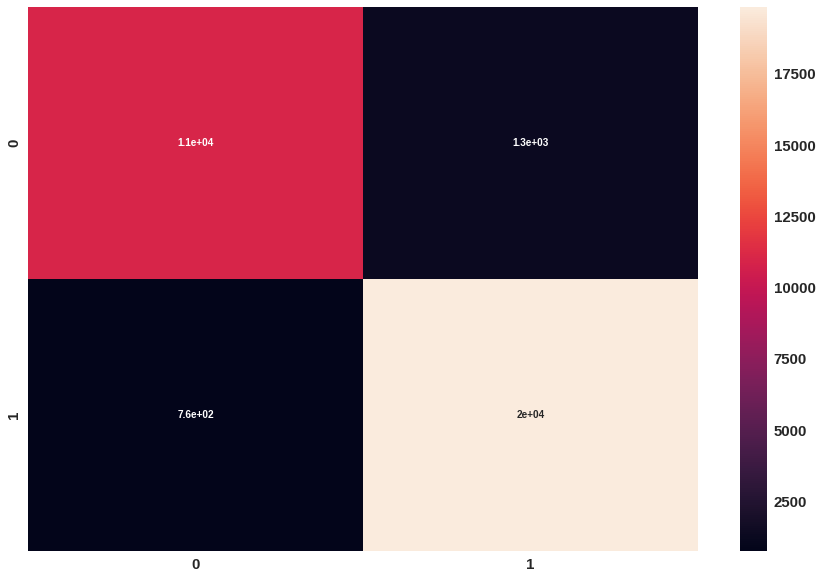

In [179]:
# Confusion matrix for training set with SGDclassifier
train_preds = sgd_clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train,train_preds),annot= True);

* Both type 1 and type 2 errors are low.

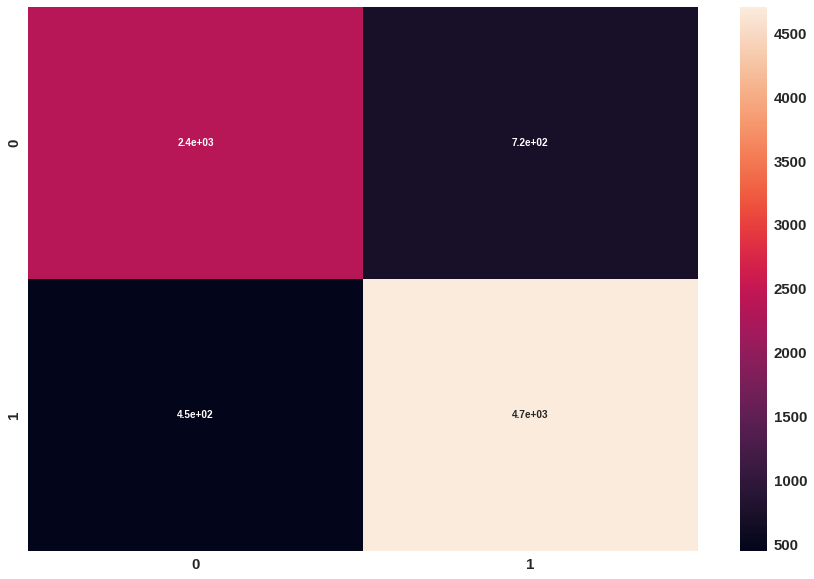

In [180]:
# Confusion matrix for testing set with SGDclassifier
sns.heatmap(confusion_matrix(y_test,sgd_prediction),annot= True);

#**Conclusion**

>For multiclass classification, the best model for this dataset would be CatBoost

>For binary classification, the best model for this dataset would be Stochastic Gradient Descent.

